#**Clinical Proteomics of Rhabdomyolysis: Molecular Insights Toward Early Detection**


#Background

##Introduction
Rhabdomyolysis begins with muscle injury triggered by physical trauma, chemical toxicity, or metabolic stress. Once initiated, a cascade of internal disruption unfolds, marked by the rapid breakdown of skeletal muscle tissue. This condition presents a significant clinical challenge due to its variable presentation and potential for severe complications, including acute kidney injury. Early detection is often hindered by nonspecific symptoms and delayed laboratory findings, which can impede timely intervention. Furthermore, current diagnostic markers lack the sensitivity and specificity needed to reliably predict disease progression. Improved early detection strategies and validated biomarkers are critically needed to enhance patient outcomes, guide clinical decisions, and prevent irreversible organ damage.

##Method
Twenty-five healthy young individuals were studied under highly controlled conditions. Venous blood samples were collected before and after experimentally induced muscle damage (rhabdomyolysis). Following injury, participants were randomized into two groups: one receiving a placebo and the other receiving Growth Hormone (GH). Each participant underwent five blood draws: (1) before muscle damage, (2) on the day of injury (post injury and prior to GH or placebo administration), (3) 3–5 days post-injury, (4) 7 days post-injury, and (5) 14 days post-injury—yielding a total of 125 plasma samples. All samples were processed and analyzed using high-throughput liquid chromatography–mass spectrometry (LC-MS). Additionally, two clinical outcome measures were assessed: creatine kinase (CK) from routine lab testing as an indicator of acute muscle damage, and the percentage of dystrophic muscle fibers assessed 7 days post-injury as a marker of chronic muscle damage.

##Objective
To comprehensively characterize the proteomic response to acute muscle injury (rhabdomyolysis) and evaluate how this response evolves over time and under the influence of Growth Hormone treatment. This study aims to identify protein signatures associated with distinct phases of muscle damage and recovery, assess correlations with clinical markers such as creatine kinase, and explore whether proteomic profiles can predict longer-term outcomes such as the percentage of dystrophic fibers. Additionally, the data may reveal early biomarkers for timely detection and risk stratification of muscle injury, which are critical for preventing complications and guiding intervention. These findings could also contribute to the development of progression markers, therapeutic targets, and deeper insights into the molecular mechanisms of muscle repair and degeneration, ultimately informing future diagnostic and personalized treatment strategies.

##Data
Attached are 2 data files:

**1)Rhabdomyolysis.xlsx:** meta data
* “subject”: subject id
* “sample”: sample id, corresponding to the column name in the proteomics data
* “visit”: the time/visit the sample was collected
* “treatment”: the treatment group the individual was in (GH/Placebo)
* “dystrophy (%)”: percentage muscle dystrophy measured at day 7 after injury
* “CK (U/L)”: creatine kinase measured with routine lab testing

**2)Rhabdomyolysis.tsv:** MS proteomics data.
Samples are columns and proteins are rows. Data has been analyzed from raw data with Spectronaut and subsequently log2 transformed.

#Preprocessing

  <font color='red'>**Please do not overwrite or delete data in the current folder.**</font>

##Loading the Data

In [1]:
#run notebook in colab
import os
from google.colab import drive
import warnings

drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/rhabdomyolysis") #change this to the directory in your own gdrive
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

meta = pd.read_excel('./01_background/rhabdomyolysis.xlsx')
proteomes = pd.read_csv('./01_background/rhabdomyolysis.tsv', sep='\t')
proteomes = proteomes.set_index('Protein.Ids')
proteomes = proteomes.drop(['Protein.Names', 'Genes'], axis=1)

In [3]:
#verify all samples are present in both datasets
meta_samples = set(meta['sample'])
proteomes_columns = set(proteomes.columns)
print(meta_samples.issubset(proteomes_columns))
print(proteomes_columns.issubset(meta_samples))

True
True


##Missingness

In [4]:
#quantify missingness
print(f"Missing per sample:\n{proteomes.isnull().sum()}\n")
print(f"Fraction missing per sample:\n{proteomes.isnull().mean()}\n")

print(f"Missing per protein:\n{proteomes.isnull().sum(axis=1)}\n")
print(f"Fraction missing per protein:\n{proteomes.isnull().mean(axis=1)}\n")

Missing per sample:
S1      154
S2      140
S3      156
S4      178
S5      745
       ... 
S142    175
S143    138
S146    161
S147    151
S148    140
Length: 125, dtype: int64

Fraction missing per sample:
S1      0.165770
S2      0.150700
S3      0.167922
S4      0.191604
S5      0.801938
          ...   
S142    0.188375
S143    0.148547
S146    0.173305
S147    0.162540
S148    0.150700
Length: 125, dtype: float64

Missing per protein:
Protein.Ids
A0A0G2JRN3;A0A024R6I7                                                                                                                              54
A0A804HIW2;A0A067XG54                                                                                                                              10
A0A075B6H7;A0A0C4DH90;A0A0C4DH55;P01624                                                                                                             7
A0A075B6H9                                                                                   

In [5]:
#quantify missingness pt2
fraction_missing = proteomes.isnull().mean(axis=1)
proteins_high_missing = proteomes[fraction_missing > 0.2]
print(f"proteins with missingness > 20%: {len(proteins_high_missing.index)}/{len(proteomes.index)}")
print(proteins_high_missing.isnull().mean(axis=1).sort_values(ascending=False))

proteins with missingness > 20%: 336/929
Protein.Ids
P00387;P00387-2;P00387-3;A0A8I5QKX1;A0A8I5QKT9;A0A8I5QKL2;B1AHF3;A0A8J8Z3C6;A0A8J8YWN6;A0A8I5KNV1;A0A8I5KPU0;A0A8I5KR71;A0A8I5KUA5;A0A8I5KTF9;A0A8I5KW26;A0A8I5KVD2;A0A8I5KYU1;A0A8I5KXI5    1.000
Q99879;P57053;Q5QNW6;Q16778;O60814;P62807;P23527;P06899;Q99880;Q99877;P33778;Q93079;Q8N257;Q96A08;P58876;U3KQK0;Q5QNW6-2                                                                     0.992
Q86YT9;A0A1W2PRS4;E9PR26;E9PKK2;Q86YT9-3;Q86YT9-4;Q86YT9-2                                                                                                                                   0.984
P55209;H0YIV4;H0YHC3;P55209-2;P55209-3;H0YH88;F8VXI6;F8VY35;F8VVB5;F8VUX1;F8VV59;F8W543;F8VRJ2;F8W118;F8W0J6;F8W020;B7Z9C2;F5H4R6                                                            0.984
Q86YZ3                                                                                                                                                                 

Before imputations it's important to filter out those rows and columns that have way too much missingness to be imputed. We do data science, not miracles.

In [6]:
proteomes_filtered = proteomes[fraction_missing <= 0.2]
proteomes_filtered = proteomes_filtered.loc[:, proteomes_filtered.isnull().mean() <= 0.3]
#proteomes_filtered.to_csv('./02_preprocessing/proteomes_filtered.csv')

###Missingness-intensity correlation

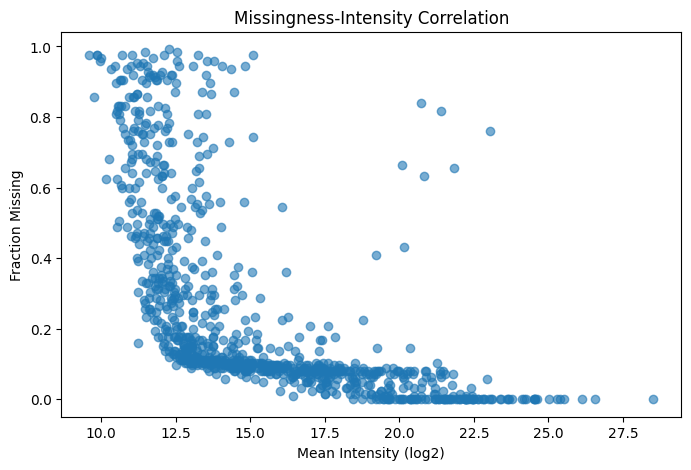

Spearman correlation: -0.857
Pearson correlation: -0.617


In [ ]:
import matplotlib.pyplot as plt

mean_intensity = proteomes.mean(axis=1, skipna=True)
fraction_missing = proteomes.isnull().mean(axis=1)

#scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(mean_intensity, fraction_missing, alpha=0.6)
plt.xlabel('Mean Intensity (log2)')
plt.ylabel('Fraction Missing')
plt.title('Missingness-Intensity Correlation')
plt.show()

#correlation coefficient
correlation = mean_intensity.corr(fraction_missing, method='spearman')
print(f"Spearman correlation: {correlation:.3f}")
correlation = mean_intensity.corr(fraction_missing, method='pearson')
print(f"Pearson correlation: {correlation:.3f}")

Given the results, the data is MNAR and there is a high correlation between the missingness and the mean intensity of each biomarker. Therefore, it would be sensible to attempt imputation for biomarkers with a missingness < 20%.
Common with proteomic data due to the intensities being below the instrument's sensitivity.

##Imputation

In [ ]:
!pip install pimms-learn --quiet

In [ ]:
proteomes_filtered = proteomes_filtered.transpose()
print(proteomes_filtered.head())
#samples should be row, proteins should be columns

Protein.Ids  A0A804HIW2;A0A067XG54  A0A075B6H7;A0A0C4DH90;A0A0C4DH55;P01624  \
S1                       16.456411                                22.982053   
S2                       15.883712                                23.236985   
S3                       17.003463                                22.772110   
S4                       17.016689                                23.058885   
S6                       17.649018                                23.316226   

Protein.Ids  A0A075B6H9  A0A075B6I0  A0A075B6I1  A0A075B6I9  A0A075B6J1  \
S1            17.972363   20.593829   15.530891   20.943136   15.634638   
S2            18.085524   20.641794   15.494124   21.018692   15.893228   
S3            17.828769   20.378375   15.194884   20.676771   15.300474   
S4            17.508886   20.178730   15.366797   20.607800   15.670316   
S6            17.680408   20.141508   12.034242   20.879242   15.385178   

Protein.Ids  A0A075B6J9  A0A075B6K0  A0A075B6K2  ...     Q9Y490  \
S1     

In [ ]:
#prepare data
proteomes_filtered.index.name = "Sample ID"
proteomes_filtered.columns.name = "protein group"
proteomes_stack = proteomes_filtered.stack().to_frame('intensity')

###Collaborative Filtering

In [ ]:
import pimmslearn.sampling
from pimmslearn.sklearn.cf_transformer import CollaborativeFilteringTransformer

#split dataset
splits, thresholds, fake_na_mcar, fake_na_mnar = pimmslearn.sampling.sample_mnar_mcar(
    df_long=proteomes_stack,
    frac_non_train=0.1,
    frac_mnar=0.5,
    random_state=42,
)
print(f"length of fake_na: {len(fake_na_mcar) + len(fake_na_mnar)}")
print(f"length of splits.train_X: {len(splits.train_X)}")
print(f"length of df_long: {len(proteomes_stack)}")
splits = pimmslearn.sampling.check_split_integrity(splits)



length of fake_na: 6560
length of splits.train_X: 59052
length of df_long: 65612


In [ ]:
cf_model = CollaborativeFilteringTransformer(
    target_column='intensity',
    sample_column='Sample ID',
    item_column='protein group',
    out_folder='runs/scikit_interface')

suggested_lr.valley = 0.00525


epoch,train_loss,valid_loss,time
0,12.610868,22.579582,00:00
1,12.341722,21.345940,00:00
2,11.746924,17.463743,00:00
3,9.997455,7.868382,00:00
4,7.380602,1.299767,00:00
5,5.351898,0.638449,00:00
6,3.960219,0.627857,00:00
7,2.992571,0.598046,00:00
8,2.309223,0.593447,00:00
9,1.815230,0.591419,00:00


No improvement since epoch 13: early stopping


CollaborativeFilteringTransformer(item_column='protein group',
                                  out_folder=Path('runs/scikit_interface'),
                                  sample_column='Sample ID',
                                  target_column='intensity')

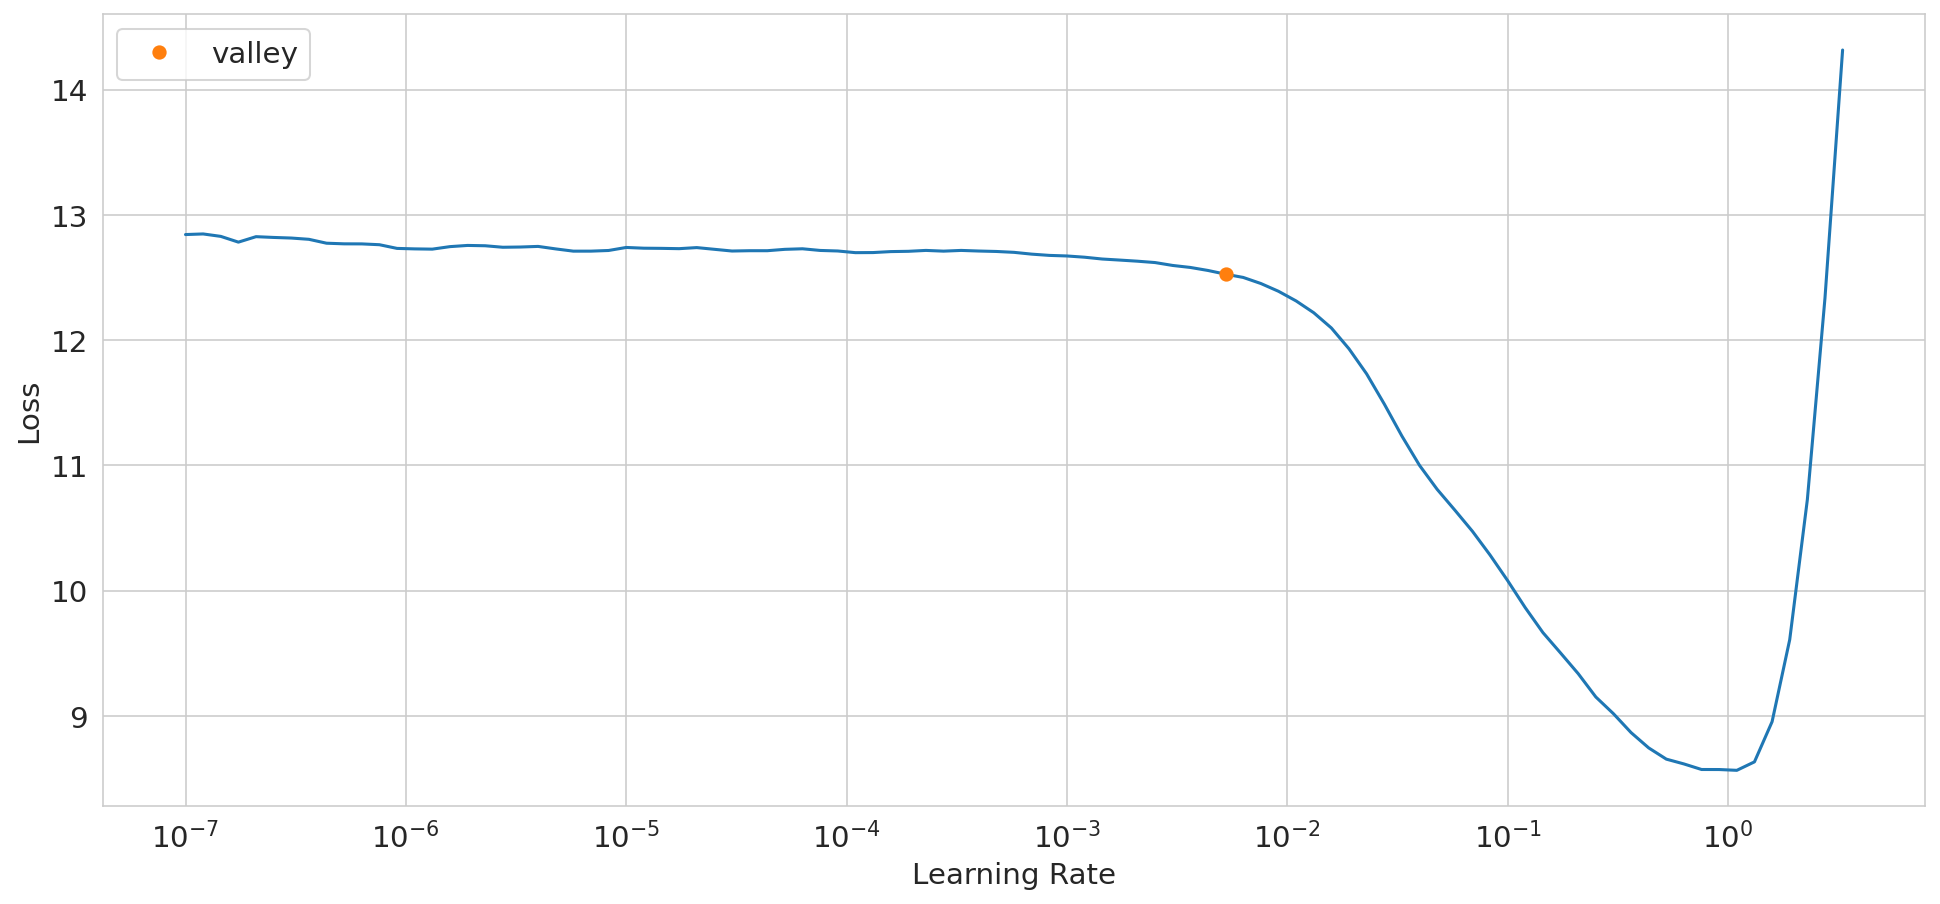

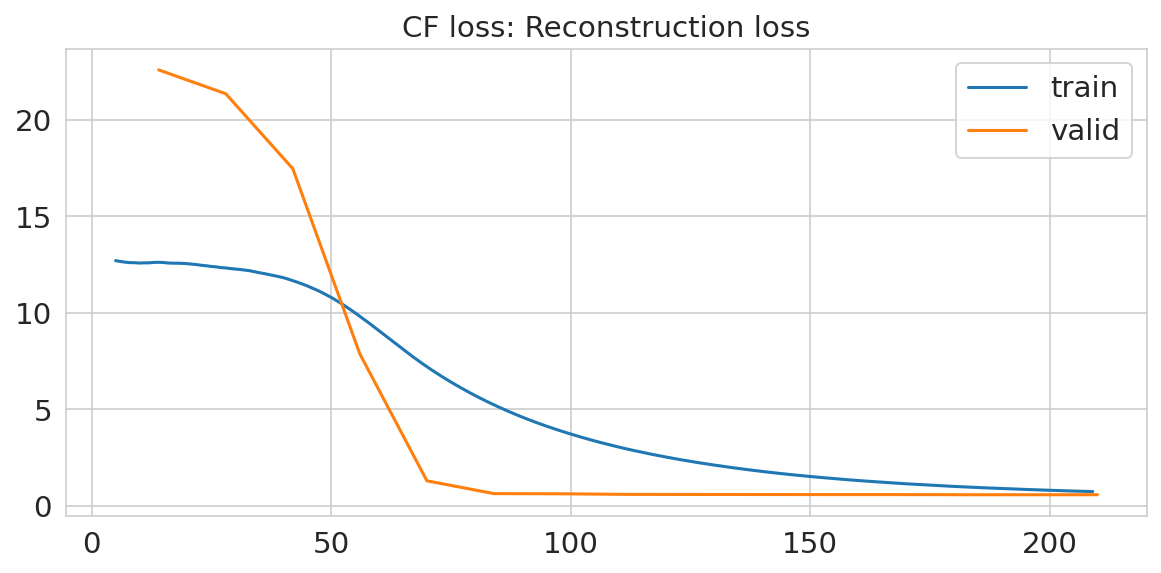

In [ ]:
cf_model.fit(splits.train_X,
             splits.val_y,
             cuda=False,
             epochs_max=20,
             )

The test and validation loss converge around 0.6 within 20 epochs, indicating good model performance

In [ ]:
proteomes_imputed = cf_model.transform(proteomes_stack).unstack()

#check that all NAs have been imputed
assert proteomes_imputed.isna().sum().sum() == 0
proteomes_imputed.head()

protein group,A0A804HIW2;A0A067XG54,A0A075B6H7;A0A0C4DH90;A0A0C4DH55;P01624,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6I9,A0A075B6J1,A0A075B6J9,A0A075B6K0,A0A075B6K2,...,Q9Y490,Q9Y4L1;A0A494C039;K7EQK2;A0A087X054,Q9Y5C1,Q9Y5F6-2,Q9Y5Y7,Q9Y646,Q9Y6R7;A0A087WXI2,Q9Y6Y1;H0YJR7;A0A8V8TQA4;A0A8V8TQX9;A0A8V8TR82;A0A8V8TR85;A0A8V8TPP2;A0A8V8TPQ2;A0A8V8TQ65;A0A8V8TQ84;A0A8V8TQ87;A0A8V8TQ98;Q9Y6Y1-2;A0A0C4DGL0,Q9Y6Z7,V9GYM3
Sample ID,,,,,,,,,,,,,,,,,,,,,
S1,16.456,22.982,17.972,20.594,15.531,20.943,15.635,18.328,15.838,11.508,...,14.924,14.225,13.218,17.868,16.611,12.557,16.870,11.294,14.983,13.577
S2,15.884,23.237,18.086,20.642,15.494,21.019,15.893,18.192,15.596,11.884,...,15.470,14.247,12.922,18.047,16.608,12.699,16.800,11.750,14.901,14.304
S3,17.003,22.772,17.829,20.378,15.195,20.677,15.300,18.078,15.547,13.850,...,13.392,13.580,13.397,17.563,16.687,13.304,16.956,12.526,14.363,14.026
S4,17.017,23.059,17.509,20.179,15.367,20.608,15.670,18.007,15.362,12.810,...,14.357,14.389,13.450,17.668,16.376,12.593,17.099,11.928,15.083,14.593
S6,17.649,23.316,17.680,20.142,12.034,20.879,15.385,17.872,15.365,12.613,...,15.997,13.993,13.364,17.217,16.308,12.194,16.974,11.994,15.029,13.697


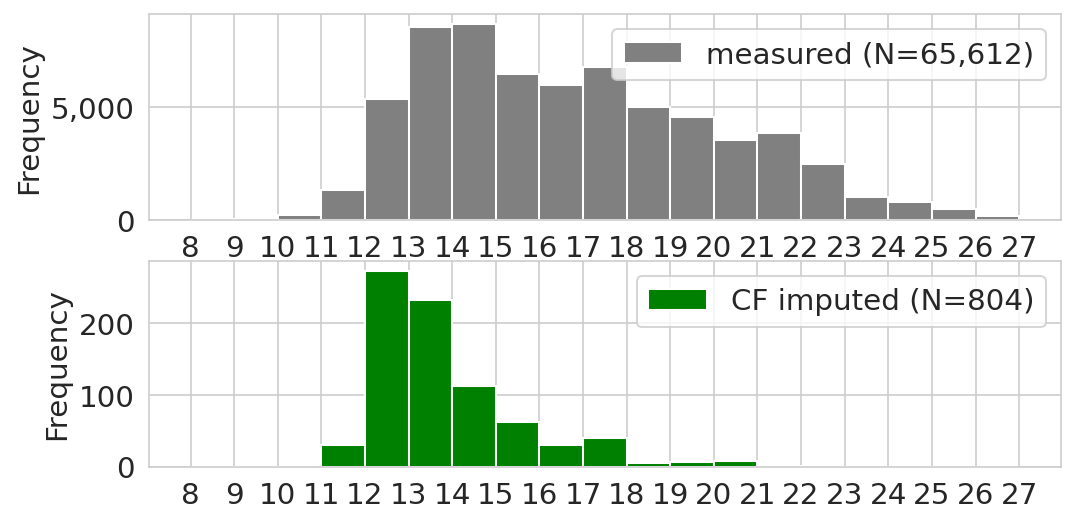

In [ ]:
#check the difference with the OG dataframe
proteomes_imputed = proteomes_imputed.stack()
observed = proteomes_imputed.loc[proteomes_stack.index]
imputed = proteomes_imputed.loc[proteomes_imputed.index.difference(proteomes_stack.index)]
proteomes_imputed = proteomes_imputed.unstack()

assert len(proteomes_stack) == len(observed)
assert proteomes_imputed.shape[0] * proteomes_imputed.shape[1] == len(imputed) + len(observed)

fig, axes = plt.subplots(2, figsize=(8, 4))

#make a plot for the distributions
min_max = pimmslearn.plotting.data.get_min_max_iterable(
    [observed, imputed])

label_template = '{method} (N={n:,d})'

ax, _ = pimmslearn.plotting.data.plot_histogram_intensities(
    observed,
    ax=axes[0],
    min_max=min_max,
    label=label_template.format(method='measured', n=len(observed), ),
    color='grey',
    alpha=1)
_ = ax.legend()

ax, _ = pimmslearn.plotting.data.plot_histogram_intensities(
    imputed,
    ax=axes[1],
    min_max=min_max,
    label=label_template.format(method='CF imputed', n=len(imputed), ),
    color='green',
    alpha=1)
_ = ax.legend()

Most of the imputed values have intensities lower than the global mean, indicating that the CF model was successfull in predicting low intensities values

###Variational Autoencoder

  <font color='red'>**Disclaimer:** the VAE was not optimized, since the CF imputation performed much better from the beginning. Hence the following code is not optimized.</font>

In [ ]:
splits.to_wide_format()

#check splits (use the same as CF imputation)
if splits.val_y is not None:
    splits.val_y = pd.DataFrame(pd.NA, index=splits.train_X.index,
                                columns=splits.train_X.columns).fillna(splits.val_y)

    print(splits.train_X.shape, splits.val_y.shape)

(112, 593) (112, 593)


In [ ]:
from pimmslearn.sklearn.ae_transformer import AETransformer

model = AETransformer(
    model="VAE",
    hidden_layers=[512,],
    latent_dim=50,
    out_folder='runs/scikit_interface',
    batch_size=10,
)

epoch,train_loss,valid_loss,time
0,823.134155,52.739281,00:00
1,829.891296,52.991138,00:00
2,824.049561,53.502361,00:00
3,818.588257,54.095207,00:00
4,811.916992,53.561256,00:00
5,805.132019,54.221424,00:00
6,798.595642,55.296528,00:00
7,790.975342,56.887428,00:00
8,783.676697,58.931896,00:00
9,773.056030,60.830627,00:00


AETransformer(batch_size=10, hidden_layers=[512], latent_dim=50,
              model=<class 'pimmslearn.models.vae.VAE'>,
              out_folder=Path('runs/scikit_interface'))

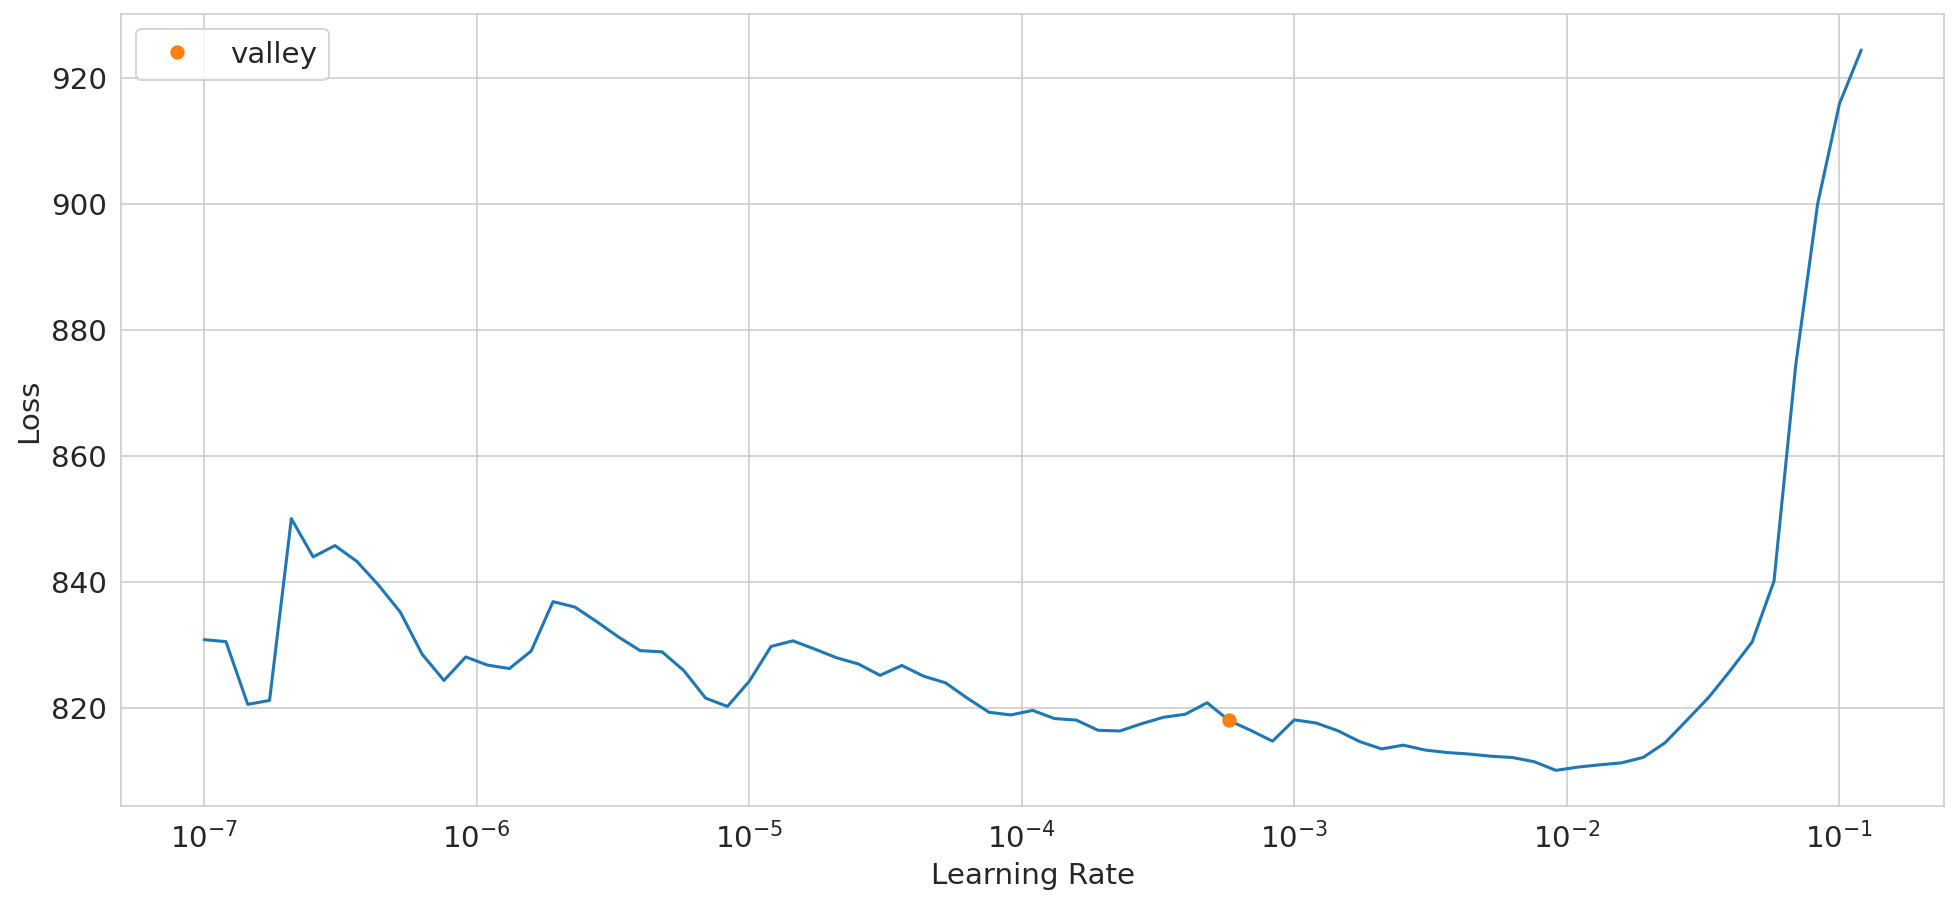

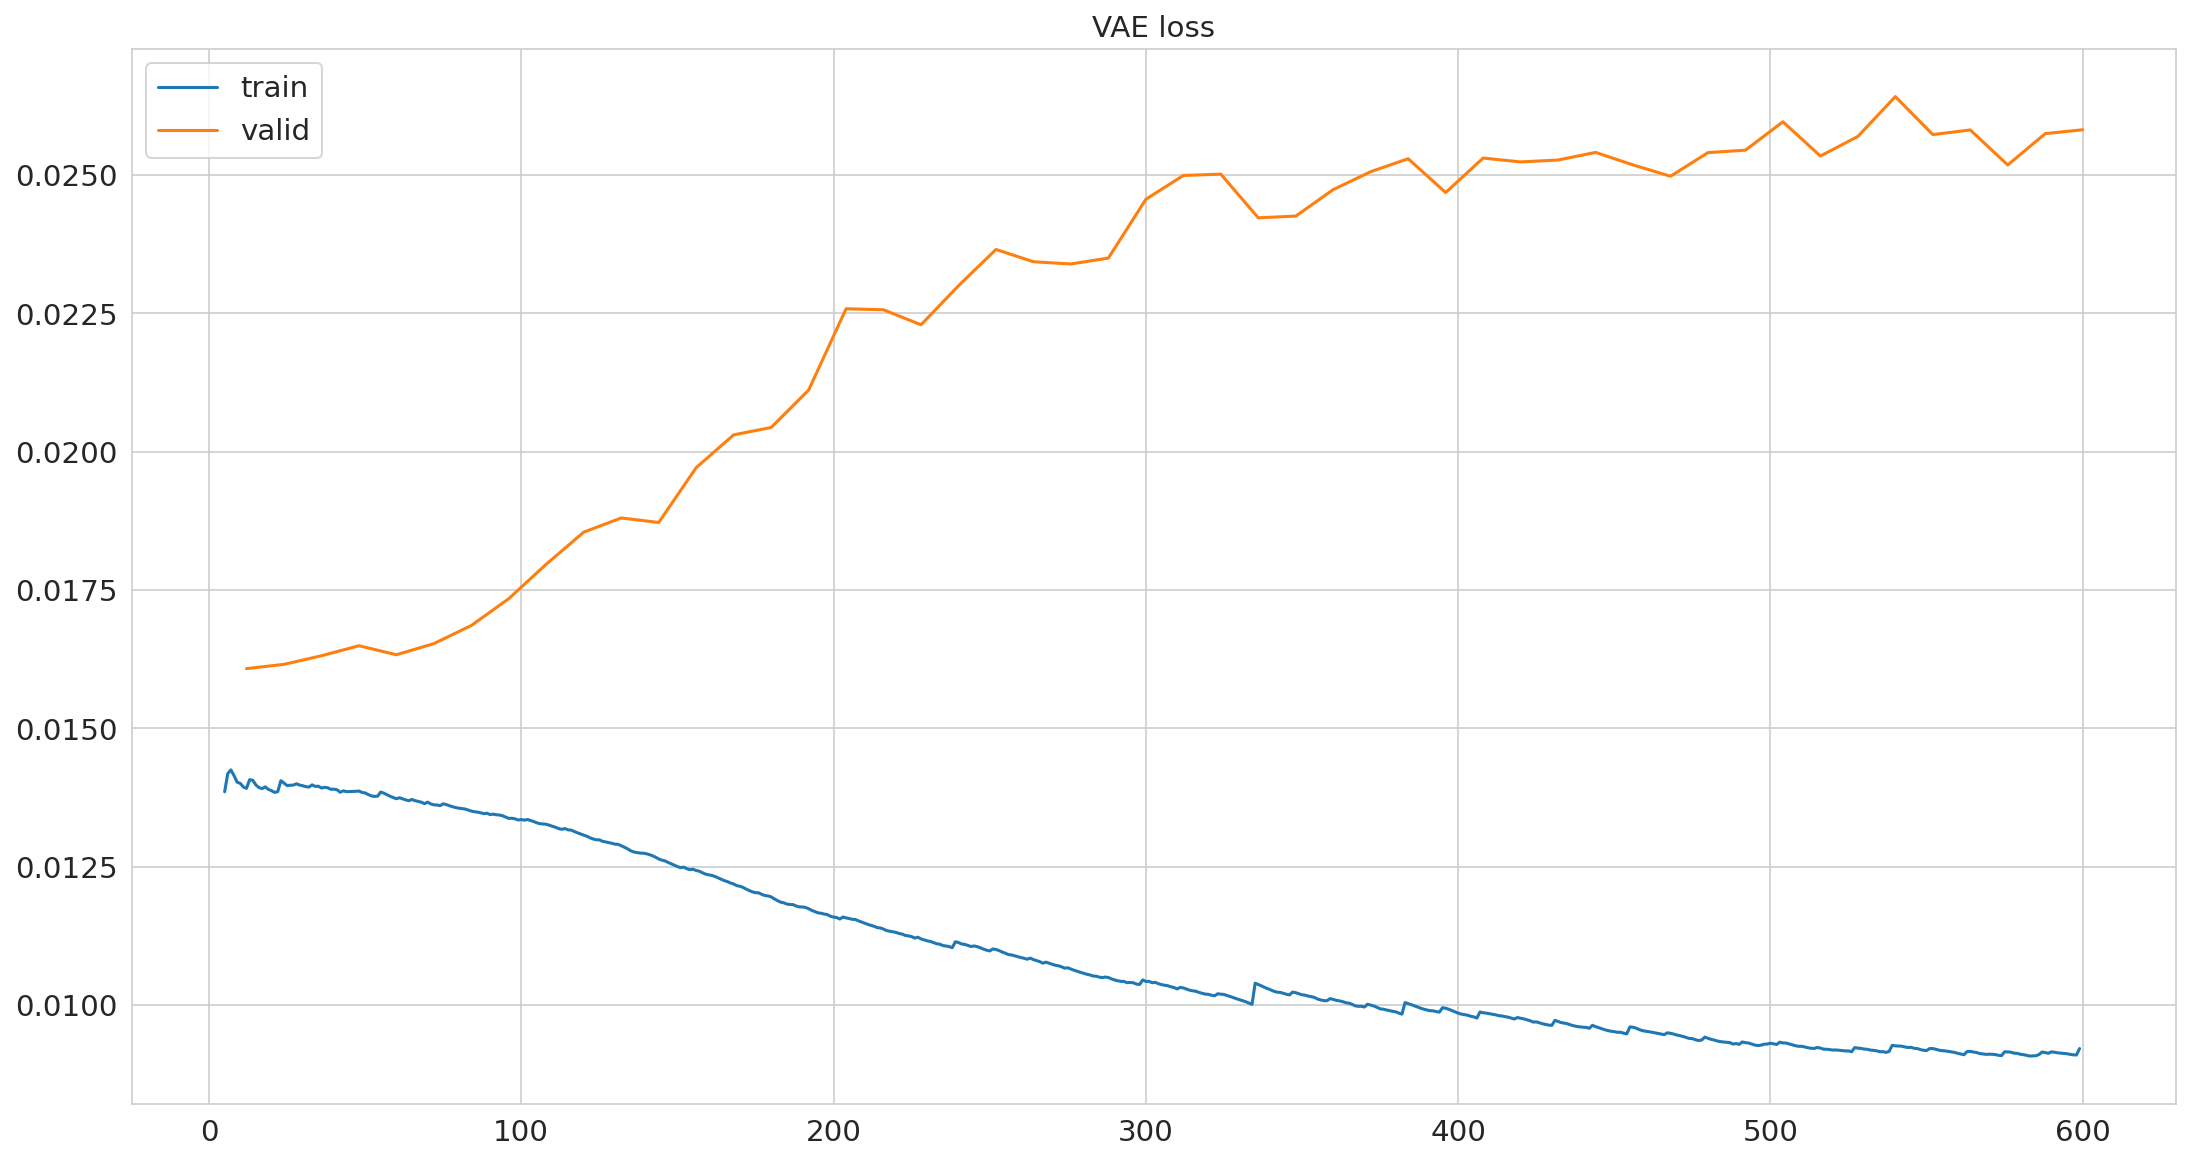

In [ ]:
model.fit(splits.train_X, splits.val_y,
          epochs_max=50,
          cuda=False)

VL and TL do not converge so overfitting is likely. This model is very bad.

###Denoising Autoencoder

  <font color='red'>**Disclaimer:** the DAE was not optimized, since the CF imputation performed much better from the beginning. Hence the following code is not optimized.</font>

In [ ]:
model = AETransformer(
    model="DAE",
    hidden_layers=[512,],
    latent_dim=50,
    out_folder='runs/scikit_interface',
    batch_size=10,
)

epoch,train_loss,valid_loss,time
0,5606.407715,371.260651,00:00
1,5435.702637,368.485748,00:00
2,5198.069824,351.121765,00:00
3,4912.233887,318.117188,00:00
4,4588.518555,290.435638,00:00
5,4274.305664,271.738922,00:00
6,3958.076904,258.202972,00:00
7,3673.999268,247.690552,00:00
8,3416.538818,242.671875,00:00
9,3183.149902,238.613739,00:00


AETransformer(batch_size=10, hidden_layers=[512], latent_dim=50,
              model=<class 'pimmslearn.models.ae.Autoencoder'>,
              out_folder=Path('runs/scikit_interface'))

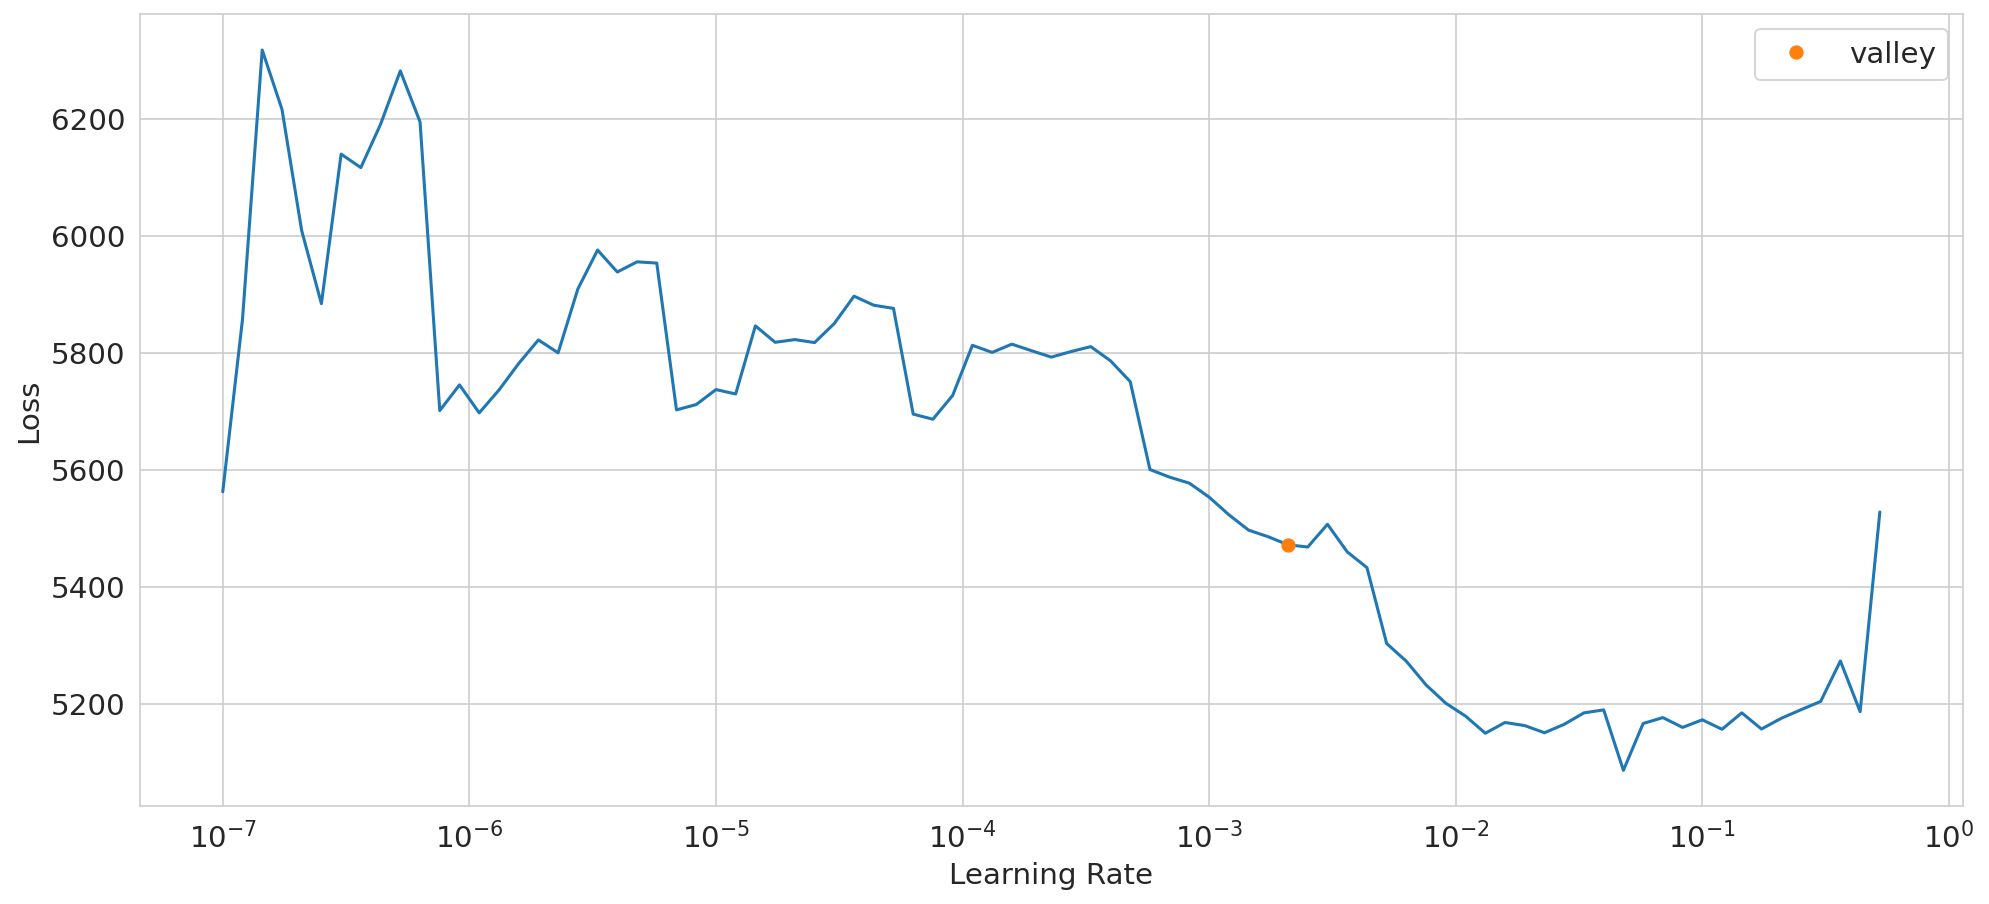

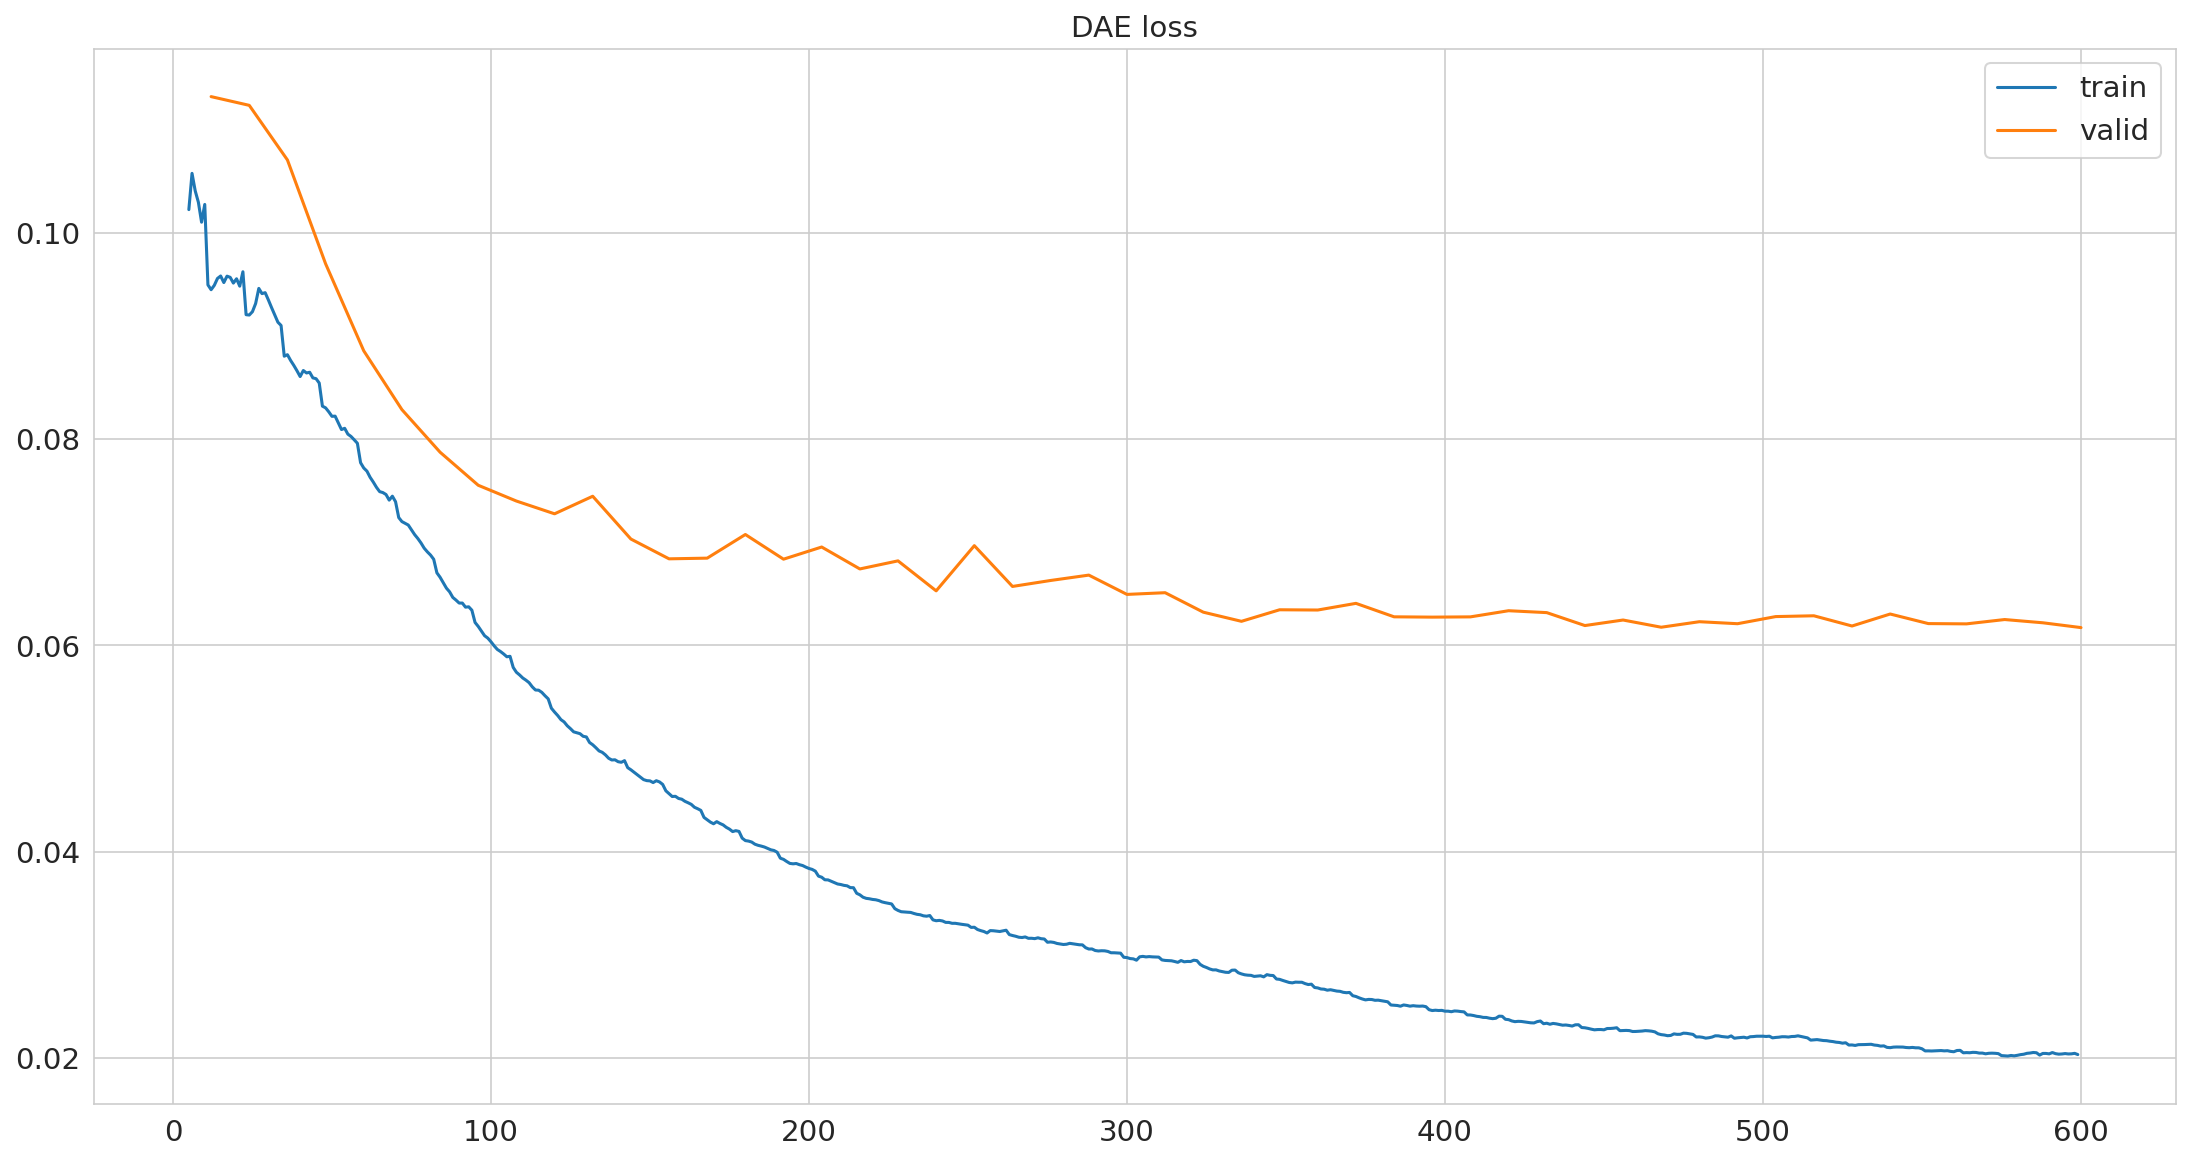

In [ ]:
model.fit(splits.train_X, splits.val_y,
          epochs_max=50,
          cuda=False)

The validation loss stabilizes at around 200, which is even worse than it was for the VAE. This model is terrible.

##Normalization

Impute first to obtain a complete matrix, then normalize. This approach preserves the raw missingness pattern for imputation, allows normalization to be applied uniformly across the whole dataset, and matches the assumptions of most downstream statistical methods.

In [ ]:
proteomes_imputed = pd.read_csv('./02_preprocessing/proteomes_imputed.csv', index_col=0)

In [ ]:
#z score normalization
proteomes_impnorm = proteomes_imputed.apply(lambda x: (x - x.mean()) / x.std(), axis=0)

#proteomes_impnorm.to_csv('./02_preprocessing/proteomes_impnorm.csv')
proteomes_impnorm

,A0A804HIW2;A0A067XG54,A0A075B6H7;A0A0C4DH90;A0A0C4DH55;P01624,A0A075B6H9,A0A075B6I0,A0A075B6I1,A0A075B6I9,A0A075B6J1,A0A075B6J9,A0A075B6K0,A0A075B6K2,...,Q9Y490,Q9Y4L1;A0A494C039;K7EQK2;A0A087X054,Q9Y5C1,Q9Y5F6-2,Q9Y5Y7,Q9Y646,Q9Y6R7;A0A087WXI2,Q9Y6Y1;H0YJR7;A0A8V8TQA4;A0A8V8TQX9;A0A8V8TR82;A0A8V8TR85;A0A8V8TPP2;A0A8V8TPQ2;A0A8V8TQ65;A0A8V8TQ84;A0A8V8TQ87;A0A8V8TQ98;Q9Y6Y1-2;A0A0C4DGL0,Q9Y6Z7,V9GYM3
Sample ID,,,,,,,,,,,,,,,,,,,,,
S1,0.837,-0.205,0.208,0.299,0.449,0.073,-0.524,0.387,0.799,-2.621,...,0.157,-0.418,-0.020,-0.223,-0.266,0.174,1.376,-0.646,0.708,0.966
S2,0.321,0.666,0.374,0.368,0.417,0.247,-0.246,0.187,0.429,-2.189,...,0.691,-0.369,-0.775,-0.007,-0.277,0.409,1.239,-0.112,0.504,1.810
S3,1.329,-0.923,-0.003,-0.013,0.153,-0.538,-0.883,0.020,0.353,0.153,...,-1.340,-1.820,0.436,-0.590,-0.053,1.407,1.546,0.798,-0.846,1.488
S4,1.341,0.057,-0.474,-0.302,0.305,-0.697,-0.485,-0.084,0.070,-1.126,...,-0.397,-0.061,0.571,-0.464,-0.927,0.234,1.826,0.097,0.959,2.146
S6,1.910,0.937,-0.222,-0.356,-2.636,-0.074,-0.792,-0.283,0.074,-1.352,...,1.206,-0.922,0.353,-1.007,-1.117,-0.425,1.582,0.174,0.824,1.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S142,-0.063,-0.108,0.505,1.239,0.096,0.583,0.303,-0.677,0.986,0.988,...,0.201,0.447,0.324,0.996,0.627,0.798,0.169,0.286,0.879,-1.483
S143,-1.380,-0.102,-0.056,1.624,0.352,0.767,0.388,-0.605,0.401,0.740,...,2.711,1.210,-1.254,0.906,0.523,1.021,-0.524,-0.192,0.318,-0.371
S146,-0.705,-0.487,-0.426,0.676,-0.974,0.734,-1.068,-1.483,0.226,0.503,...,0.300,0.669,-0.602,-0.369,0.179,0.948,-0.592,-0.057,-3.106,-2.810


##Outlier detection

Performing a quick PCA and plotting PC1 and PC2 can show if there are observation that greatly differ from all the others.

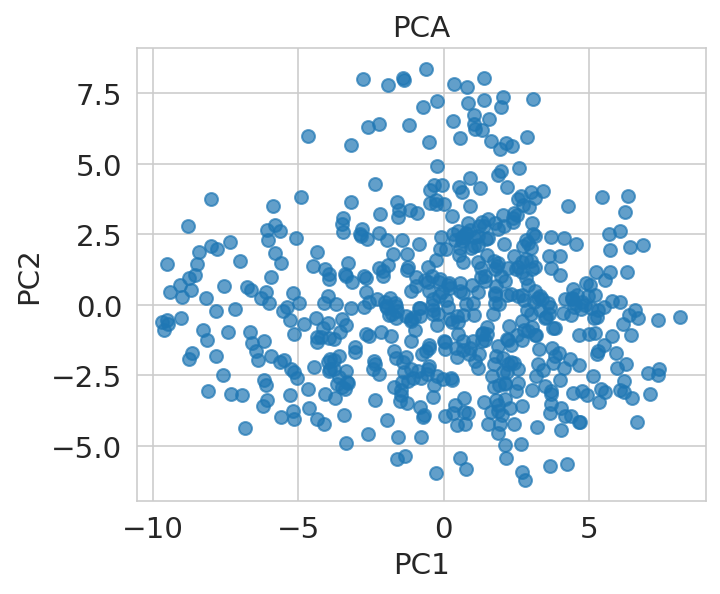

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

data = proteomes_impnorm.T

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

plt.figure(figsize=(5,4))
plt.scatter(X_pca[:,0], X_pca[:,1], s=40, alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()


Observation with a mean intensity much higher/lower than all the others are likely outliers.

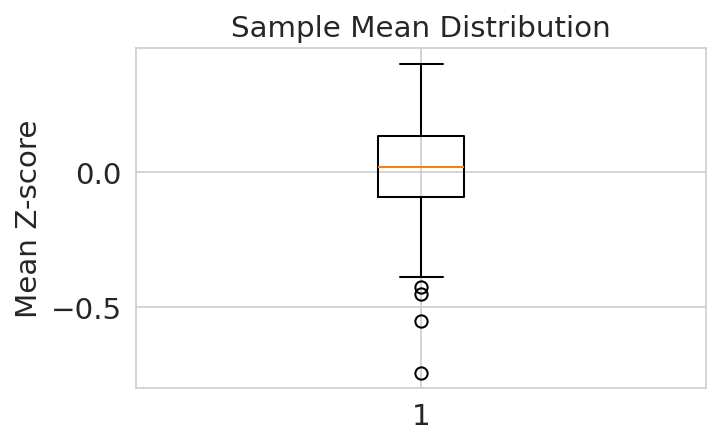

In [ ]:
sample_means = proteomes_impnorm.mean(axis=1)
plt.figure(figsize=(5,3))
plt.boxplot(sample_means)
plt.title('Sample Mean Distribution')
plt.ylabel('Mean Z-score')
plt.show()


In [ ]:
#find outlier samples
z_scores = (sample_means - sample_means.mean()) / sample_means.std()
outlier_samples = proteomes_impnorm.index[np.abs(z_scores) > 3]
print("Outliers:", outlier_samples.tolist())


Outliers: ['S46']


In [ ]:
#remove sample detected as outlier
proteomes_impnorm_noout = proteomes_impnorm.drop(index=outlier_samples, errors="ignore")

#proteomes_impnorm_noout.to_csv('./02_preprocessing/proteomes_impnorm_noout.csv')

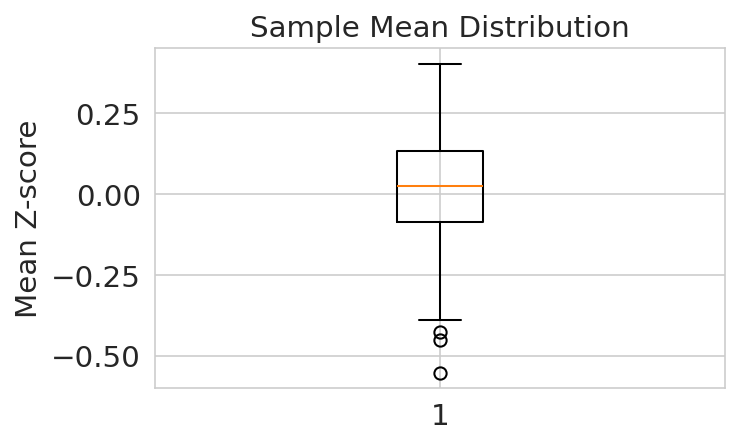

In [ ]:
#replot means intensities per sample
sample_means = proteomes_impnorm_noout.mean(axis=1)
plt.figure(figsize=(5,3))
plt.boxplot(sample_means)
plt.title('Sample Mean Distribution')
plt.ylabel('Mean Z-score')
plt.show()


#Exploratory Data Analysis

In [4]:
#reload previously saved dataframe if needed
proteomes_impnorm_noout = pd.read_csv('./02_preprocessing/proteomes_impnorm_noout.csv', index_col=0)

In [5]:
#prepare the metadata table
meta = meta.loc[:, ~meta.columns.str.contains('^Unnamed')]
meta = meta.set_index('sample')
meta = meta.loc[meta.index.intersection(proteomes_impnorm_noout.index)]
meta

,subject,visit,treatment,dystrophy (%),CK (U/L)
S1,1,pre,NaN,NaN,NaN
S2,1,post_0,GH,NaN,105
S3,1,post_3-5,GH,NaN,15600
S4,1,post_7,GH,16.296296,1750
S6,2,pre,NaN,NaN,NaN
...,...,...,...,...,...
S142,25,pre,NaN,NaN,NaN
S143,25,post_0,GH,NaN,89
S146,25,post_3-5,GH,NaN,15800
S147,25,post_7,GH,51.55096,1370


In [6]:
meta['visit'] = pd.Categorical(
        meta['visit'],
        categories=['pre', 'post_0', 'post_3-5', 'post_7', 'post_14'],
        ordered=True)

In [ ]:
#meta.to_csv('./02_preprocessing/meta.csv')

Subject centering removes all effects caused by difference between subjects. The `treatment` variable is nested within `subject` so this should be used with caution, but it can be useful to study which features/PCs show a correlation to other variables after removing the variance attributed to subject/treatment.

<font color='red'>**Do not run the following cell unless you wish to perform subject centering**</font>

In [ ]:
meta_subjects = meta.loc[proteomes_impnorm_noout.index, 'subject']

def subject_centering(df, meta_subjects):
    df_centered = df.copy()
    for subject in meta_subjects.unique():
        idx = meta_subjects[meta_subjects == subject].index
        #subtract mean across samples for this subject
        df_centered.loc[idx] = df.loc[idx] - df.loc[idx].mean(axis=0)
    return df_centered

proteomes_impnorm_noout = subject_centering(proteomes_impnorm_noout, meta_subjects)

In [ ]:
#proteomes_impnorm_noout.to_csv('./02_preprocessing/proteomes_impnorm_noout_sc.csv')

##PCA

PCA can help identifying the main contributors to the variance in our dataset. By playing around with pre and post subject centering data, it is also possible to see what variables are affected by it and what variables are not.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
from scipy.stats import spearmanr
from scipy.stats import kruskal
from sklearn.decomposition import PCA
from matplotlib_venn import venn2, venn3, venn3_circles, venn2_circles

###Scree Plot

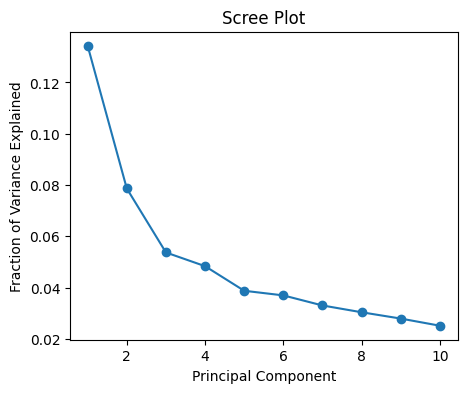

In [ ]:
#scree plot to analyze the variance explained
pca = PCA(n_components=10)
pcs = pca.fit_transform(proteomes_impnorm_noout)

plt.figure(figsize=(5,4))
plt.plot(range(1, 11), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Fraction of Variance Explained')
plt.title('Scree Plot')
plt.show()


In [ ]:
explained = pca.explained_variance_ratio_
cumulative = explained.cumsum()

print(f"Explained variance by component: {explained}")
print(f"Cumulative explained variance: {cumulative}")


Explained variance by component: [0.13434441 0.07865553 0.05369487 0.04834656 0.03874918 0.03694384
 0.03301607 0.03036181 0.02790178 0.02511447]
Cumulative explained variance: [0.13434441 0.21299995 0.26669481 0.31504138 0.35379056 0.3907344
 0.42375048 0.45411229 0.48201407 0.50712854]


The following are the fractions of variance explained for the first 10 components


```
0.13434441, 0.07865553, 0.05369487, 0.04834656, 0.03874924, 0.03694384, 0.03301578, 0.03036219, 0.02790037, 0.02512283
```

The first 3 PCs capture 26.6% of the total variance. The gradual decrease in explained variance after the first 3 components suggests that the underlying structure of the dataset is moderately complex, and no single component or small subset of components dominates the total variance.

There isn't a clear elbow in the curve, and the top 9 PCs are required to obtain a cumulative explained variance > 50%.

After subject centering this changes to



```
0.13052804, 0.09312776, 0.06349714, 0.04877753, 0.04765353,0.03616232, 0.03255   , 0.02706642, 0.02470868, 0.01865599
```



###PCA and metadata

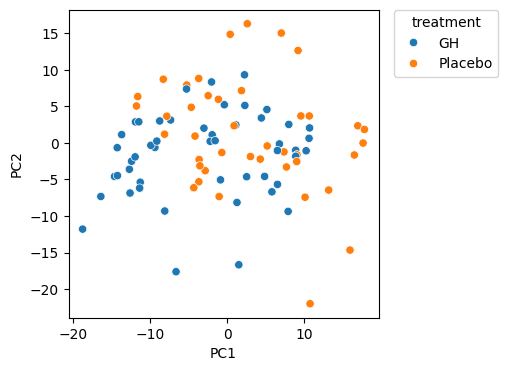

In [ ]:
#change components and coloring to study correlations
pca_df = pd.DataFrame(pcs[:, :2], index=proteomes_impnorm_noout.index, columns=['PC1', 'PC2']) #principal components
pca_df = pca_df.join(meta[['treatment']]) #change column from metadata

plt.figure(figsize=(4,4))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='treatment', palette='tab10') #change here too
plt.legend(
    title='treatment', #here too!
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.
)
plt.show()


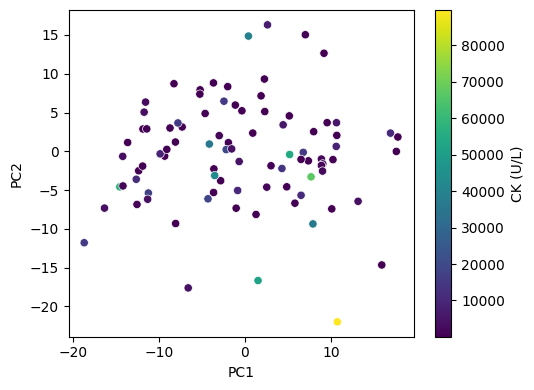

In [ ]:
#same but for continuous variables
pca_df = pd.DataFrame(pcs[:, :2], index=proteomes_impnorm_noout.index, columns=['PC1', 'PC2']) #principal components
pca_df = pca_df.join(meta[['CK (U/L)']]) #column from metadata
pca_df['CK (U/L)'] = pd.to_numeric(pca_df['CK (U/L)'], errors='coerce')

plt.figure(figsize=(5.45,4)) #5.45 for ck
scatter = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='CK (U/L)', palette='viridis', legend=False)
norm = plt.Normalize(pca_df['CK (U/L)'].min(), pca_df['CK (U/L)'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=scatter)
cbar.set_label('CK (U/L)')

plt.tight_layout()
plt.show()

In [ ]:
#correlation between PCs and metadata variables
pca_df = pd.DataFrame(pcs[:, :10], index=proteomes_impnorm_noout.index, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']) #principal components
pca_df = pca_df.join(meta[['subject', 'visit', 'treatment', 'dystrophy (%)', 'CK (U/L)']])

pca_df['dystrophy (%)'] = pd.to_numeric(pca_df['dystrophy (%)'], errors='coerce')
pca_df['CK (U/L)'] = pd.to_numeric(pca_df['CK (U/L)'], errors='coerce')

In [ ]:
#correlate PCs to continuous variables
continuous_vars = ['dystrophy (%)', 'CK (U/L)']
pc_axes = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

results_cont = []
for axis in pc_axes:
    for var in continuous_vars:
        mask = pca_df[[axis, var]].dropna()
        if mask.shape[0] > 0:
            corr, pval = spearmanr(mask[axis], mask[var])
            results_cont.append({'PC': axis, 'Variable': var, 'Spearman rho': corr, 'p-value': pval})

cont_corr_df = pd.DataFrame(results_cont)
print(cont_corr_df)



      PC       Variable  Spearman rho   p-value
0    PC1  dystrophy (%)     -0.059474  0.792624
1    PC1       CK (U/L)     -0.000687  0.994933
2    PC2  dystrophy (%)     -0.099123  0.660755
3    PC2       CK (U/L)     -0.240117  0.024236
4    PC3  dystrophy (%)     -0.196546  0.380668
5    PC3       CK (U/L)      0.118896  0.269891
6    PC4  dystrophy (%)     -0.180120  0.422487
7    PC4       CK (U/L)      0.052262  0.628680
8    PC5  dystrophy (%)      0.016992  0.940171
9    PC5       CK (U/L)     -0.426483  0.000034
10   PC6  dystrophy (%)     -0.020391  0.928233
11   PC6       CK (U/L)     -0.070851  0.511845
12   PC7  dystrophy (%)      0.177288  0.429939
13   PC7       CK (U/L)      0.025008  0.817096
14   PC8  dystrophy (%)     -0.557918  0.006973
15   PC8       CK (U/L)     -0.317511  0.002575
16   PC9  dystrophy (%)      0.274711  0.215987
17   PC9       CK (U/L)     -0.383237  0.000228
18  PC10  dystrophy (%)     -0.022090  0.922269
19  PC10       CK (U/L)      0.116950  0

```
      PC       Variable  Spearman rho   p-value
0    PC1  dystrophy (%)     -0.059474  0.792624
1    PC1       CK (U/L)     -0.000687  0.994933
2    PC2  dystrophy (%)     -0.099123  0.660755
3    PC2       CK (U/L)     -0.240117  0.024236 *
4    PC3  dystrophy (%)     -0.196546  0.380668
5    PC3       CK (U/L)      0.118896  0.269891
6    PC4  dystrophy (%)     -0.180120  0.422487
7    PC4       CK (U/L)      0.052262  0.628680
8    PC5  dystrophy (%)      0.016992  0.940171
9    PC5       CK (U/L)     -0.426483  0.000034 *
10   PC6  dystrophy (%)     -0.020391  0.928233
11   PC6       CK (U/L)     -0.070851  0.511845
12   PC7  dystrophy (%)      0.177288  0.429939
13   PC7       CK (U/L)      0.024181  0.823049
14   PC8  dystrophy (%)     -0.557918  0.006973 °
15   PC8       CK (U/L)     -0.316155  0.002693 *
16   PC9  dystrophy (%)      0.274711  0.215987
17   PC9       CK (U/L)     -0.383862  0.000223 *
18  PC10  dystrophy (%)     -0.030586  0.892517
19  PC10       CK (U/L)      0.125148  0.245325
```

Somewhat ok results. PC2, PC5, PC8 and PC9 correlate with `CK`, while only PC 8 correlates with `dystrophy`.

After normalizing the dataset by `subject`, these are the new results:



```
      PC       Variable  Spearman rho       p-value
0    PC1  dystrophy (%)      0.245257  2.712796e-01
1    PC1       CK (U/L)     -0.188541  7.854411e-02
2    PC2  dystrophy (%)     -0.122346  5.875435e-01
3    PC2       CK (U/L)      0.717805  3.551376e-15 *
4    PC3  dystrophy (%)     -0.121213  5.910332e-01
5    PC3       CK (U/L)      0.050950  6.373342e-01
6    PC4  dystrophy (%)     -0.154631  4.920205e-01
7    PC4       CK (U/L)     -0.252797  1.748853e-02 *
8    PC5  dystrophy (%)     -0.468425  2.789276e-02 °
9    PC5       CK (U/L)      0.026594  8.057242e-01
10   PC6  dystrophy (%)     -0.244691  2.724232e-01
11   PC6       CK (U/L)      0.143473  1.823474e-01
12   PC7  dystrophy (%)      0.113283  6.157033e-01
13   PC7       CK (U/L)     -0.163982  1.268497e-01
14   PC8  dystrophy (%)     -0.135373  5.480611e-01
15   PC8       CK (U/L)     -0.110451  3.056240e-01
16   PC9  dystrophy (%)     -0.184651  4.107101e-01
17   PC9       CK (U/L)      0.243516  2.223972e-02 *
18  PC10  dystrophy (%)     -0.372701  8.758874e-02
19  PC10       CK (U/L)     -0.106999  3.210792e-01
```

PC2, PC4 and PC9 seem to be correlated with `CK`, while PC5 seems correlated with `dystrophy`. This suggests that analysis on these two variables could be carried out on both the pre and post subject centering dataset.

In [ ]:
#correlation between categorical variables and PCs
cat_vars = ['subject', 'visit', 'treatment']
results_cat = []

for axis in pc_axes:
    for var in cat_vars:
        groups = [pca_df[pca_df[var] == v][axis].dropna() for v in pca_df[var].unique() if pd.notnull(v)]
        if len(groups) > 1:
            stat, pval = kruskal(*groups)
            results_cat.append({'PC': axis, 'Variable': var, 'Kruskal-Wallis H': stat, 'p-value': pval})

cat_corr_df = pd.DataFrame(results_cat)
print(cat_corr_df)

      PC   Variable  Kruskal-Wallis H       p-value
0    PC1    subject         88.293147  2.757625e-09
1    PC1      visit          1.079412  8.975247e-01
2    PC1  treatment          8.342169  3.873533e-03
3    PC2    subject         73.389994  6.627265e-07
4    PC2      visit         12.980587  1.137104e-02
5    PC2  treatment          3.162489  7.534824e-02
6    PC3    subject         81.335843  3.721880e-08
7    PC3      visit          6.551975  1.615448e-01
8    PC3  treatment         11.386492  7.398013e-04
9    PC4    subject         82.557819  2.368447e-08
10   PC4      visit          1.154233  8.855749e-01
11   PC4  treatment          9.603351  1.942226e-03
12   PC5    subject         80.236390  5.578562e-08
13   PC5      visit         18.320124  1.068395e-03
14   PC5  treatment          3.988355  4.581578e-02
15   PC6    subject         98.192745  6.098030e-11
16   PC6      visit          1.298358  8.616540e-01
17   PC6  treatment         10.423572  1.244170e-03
18   PC7    

```
      PC   Variable  Kruskal-Wallis H       p-value
0    PC1    subject         88.293147  2.757625e-09 °
1    PC1      visit          1.079412  8.975247e-01
2    PC1  treatment          8.342169  3.873533e-03 #
3    PC2    subject         73.389994  6.627265e-07 °
4    PC2      visit         12.980587  1.137104e-02 *
5    PC2  treatment          3.162489  7.534824e-02
6    PC3    subject         81.375820  3.667381e-08 °
7    PC3      visit          6.542487  1.621329e-01
8    PC3  treatment         11.386492  7.398013e-04 #
9    PC4    subject         82.557819  2.368447e-08 °
10   PC4      visit          1.154233  8.855749e-01
11   PC4  treatment          9.603351  1.942226e-03 #
12   PC5    subject         80.286728  5.476375e-08 °
13   PC5      visit         18.241689  1.106839e-03 *
14   PC5  treatment          3.988355  4.581578e-02 #
15   PC6    subject         98.192745  6.098030e-11 °
16   PC6      visit          1.298358  8.616540e-01
17   PC6  treatment         10.423572  1.244170e-03 #
18   PC7    subject         84.179488  1.295556e-08 °
19   PC7      visit          3.856556  4.257668e-01
20   PC7  treatment          0.435989  5.090650e-01
21   PC8    subject         88.723488  2.342429e-09 °
22   PC8      visit          8.094279  8.818504e-02
23   PC8  treatment          4.086025  4.323922e-02 #
24   PC9    subject         79.323311  7.795707e-08 °
25   PC9      visit         19.583980  6.032457e-04 *
26   PC9  treatment          0.073663  7.860762e-01
27  PC10    subject         96.462629  1.196939e-10 °
28  PC10      visit          1.213989  8.757900e-01
29  PC10  treatment          3.220382  7.272666e-02
```

This looks good. As expected, the strongest correlation and significance is with the variable `subject`, indicating that most variance is caused simply by differences between subjects.

PC1, PC3, PC4 and PC5 seem particolarly correlated with `treatment`.
PC2 and PC5 seem correlated with `CK` and `visit` (check covariance).

The new results after normalizing by subject:

```
      PC   Variable  Kruskal-Wallis H       p-value
0    PC1    subject         12.054858  9.792830e-01
1    PC1      visit         16.281590  2.663677e-03 *
2    PC1  treatment          0.001329  9.709172e-01
3    PC2    subject          1.827301  1.000000e+00
4    PC2      visit         66.694194  1.130915e-13 *
5    PC2  treatment          0.129981  7.184517e-01
6    PC3    subject          1.706306  1.000000e+00
7    PC3      visit         30.750043  3.442667e-06 *
8    PC3  treatment          0.830740  3.620587e-01
9    PC4    subject          2.402606  1.000000e+00
10   PC4      visit         13.586761  8.737722e-03 *
11   PC4  treatment          0.689617  4.062949e-01
12   PC5    subject          2.383253  1.000000e+00
13   PC5      visit         35.411897  3.822822e-07 *
14   PC5  treatment          0.000148  9.903038e-01
15   PC6    subject          2.341441  1.000000e+00
16   PC6      visit         10.951210  2.711786e-02 *
17   PC6  treatment          0.256401  6.126035e-01
18   PC7    subject          4.367889  9.999967e-01
19   PC7      visit          6.629321  1.568223e-01
20   PC7  treatment          3.076633  7.942478e-02
21   PC8    subject          2.165975  1.000000e+00
22   PC8      visit         27.641316  1.474456e-05 *
23   PC8  treatment          0.007237  9.322069e-01
24   PC9    subject          1.815734  1.000000e+00
25   PC9      visit         19.000654  7.857116e-04 *
26   PC9  treatment          0.217018  6.413216e-01
27  PC10    subject          4.832770  9.999910e-01
28  PC10      visit          8.672662  6.982293e-02
29  PC10  treatment          0.290271  5.900471e-01
```

PC1, PC2, PC3, PC4, PC5, PC6, PC8 and PC9 all seem correlated with `visit`. There is no more correlation to `treatment`, indicating that before subject centering this correlation was likely caused by variance between



###Extract Loadings

Principal components are not features from our collected data, they are linear combinations of the original variables. We can extract the features that contribute the most to each PC to have a first overview of what proteins **might** be affecting outcomes.

In [ ]:
proteins = proteomes_impnorm_noout.columns
pcs_of_interest = list(range(10)) #can change depending on how many and which PCs we want

top_proteins_by_pc = {}
dfs = []

for pc_idx in pcs_of_interest:
    loadings = pca.components_.T[:, pc_idx]
    loading_df = pd.DataFrame({
        'loading': loadings,
        'abs_loading': np.abs(loadings)
    }, index=proteins).sort_values('abs_loading', ascending=False)

    n_top = int(0.05 * len(loading_df))  #only keep top 5%
    top_proteins = loading_df.head(n_top)
    top_proteins_by_pc[f'PC{pc_idx+1}'] = top_proteins

    loading_df['PC'] = f'PC{pc_idx+1}'
    loading_df['protein'] = loading_df.index
    dfs.append(loading_df)

all_loadings = pd.concat(dfs, axis=0, ignore_index=True)

In [ ]:
#save dataframe
#all_loadings.to_csv('./03_EDA/loadings_sc.csv', index=False)

We can then analyze the intersection of top contributors to PCs correlated to a variable of choice (eg. `treatment`) and see if one or more proteins stand out

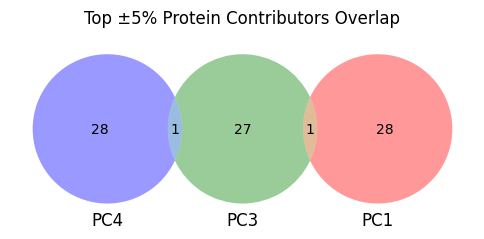

Proteins in top ±5% for all PCs (PC1, PC3, PC4):
[]


In [ ]:
#venn diagram example with PC1, PC3 and PC4 (all correlated to treatment)
sets = [set(top_proteins_by_pc['PC1'].index), set(top_proteins_by_pc['PC3'].index), set(top_proteins_by_pc['PC4'].index)]
plt.figure(figsize=(6,4))
venn3(sets, set_labels=('PC1', 'PC3', 'PC4'))
plt.title('Top ±5% Protein Contributors Overlap')
plt.show()

overlap_pcs = set(top_proteins_by_pc['PC1'].index) & set(top_proteins_by_pc['PC3'].index) & set(top_proteins_by_pc['PC4'].index)
print(f"Proteins in top ±5% for all PCs (PC1, PC3, PC4):")
print(list(overlap_pcs))


Poor overlap, with no proteins appearing in all 3 PCs

###Visualization

Let's visualize the PC trajectories over multiple visits, colored by treatment, and see if they show a difference between treatment groups.

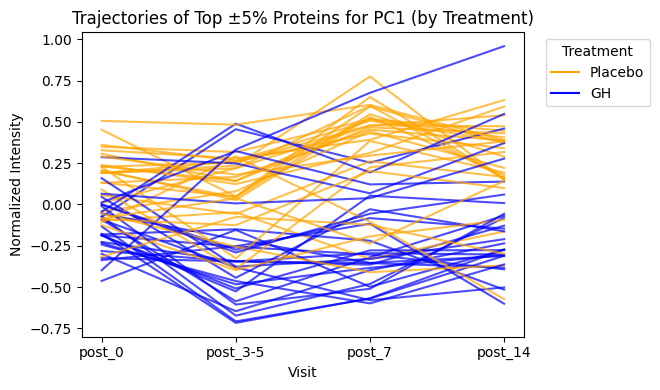

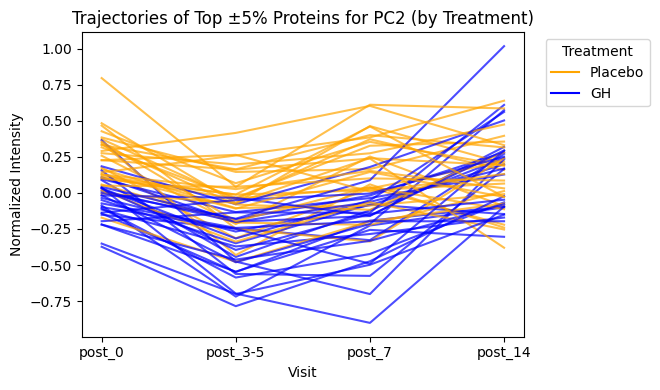

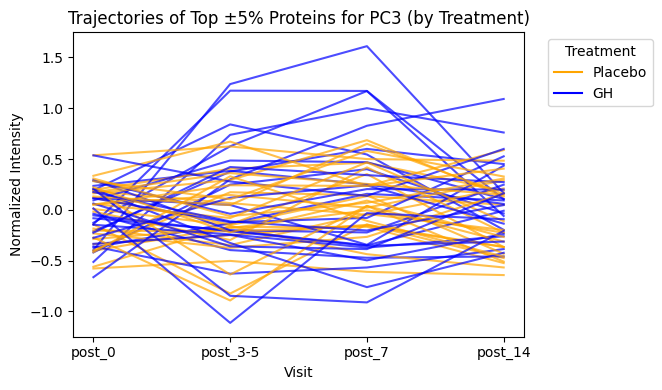

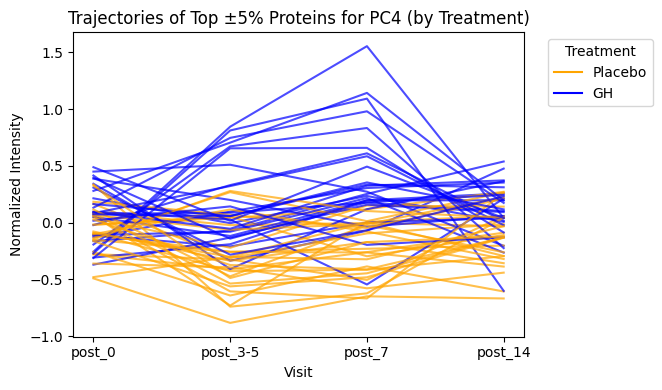

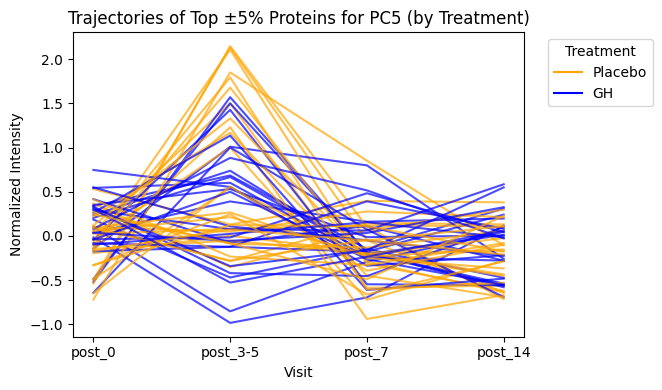

In [ ]:
#plot trajectories over multiple visits
treatment_colors = {'Placebo': 'orange', 'GH': 'blue'}

for pc in ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']:
    top_proteins = top_proteins_by_pc[pc].index

    plt.figure(figsize=(7,4))
    for protein in top_proteins:
        plot_df = meta.copy()
        plot_df['intensity'] = proteomes_impnorm_noout[protein]
        for treatment in plot_df['treatment'].unique():
            group = plot_df[plot_df['treatment'] == treatment]
            means = group.groupby('visit')['intensity'].mean()
            plt.plot(means.index, means.values,
                     color=treatment_colors.get(treatment, 'gray'),
                     alpha=0.7)

    for treatment, color in treatment_colors.items():
        plt.plot([], [], color=color, label=treatment)

    plt.title(f"Trajectories of Top ±5% Proteins for {pc} (by Treatment)")
    plt.xlabel('Visit')
    plt.ylabel('Normalized Intensity')
    plt.legend(title='Treatment', loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.tight_layout()
    plt.show()


Without subject centering, these plots show a fairly clear separation between subjects treated with GH and subjects that received the placebo. However, after subject centering this distinction is much harder to see. This suggests that it is probably better to avoid subject centering when studying the effects of the treatment with GH.

##UMAP

With UMAP we can see how observations are clustered, and further examine the effects of our data preparation strategies.

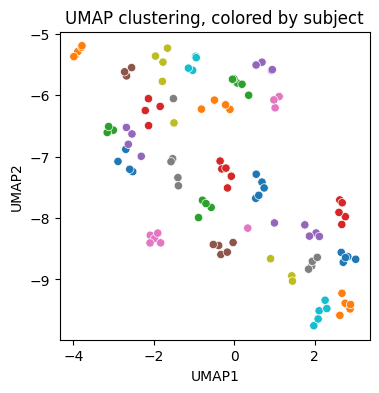

In [ ]:
#UMAP plot
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(proteomes_impnorm_noout)

umap_df = pd.DataFrame(embedding, index=proteomes_impnorm_noout.index, columns=['UMAP1', 'UMAP2'])
umap_df = umap_df.join(meta[['subject']])

plt.figure(figsize=(4,4))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='subject', palette='tab10', legend= False)
plt.title('UMAP clustering, colored by subject')
#plt.legend(title='subject', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


Before subject centering, observations are mostly clustered by `subject`, but there is still some discernible `treatment` clustering. However, there seem to be no clusters based on other variables like `visit`.

After subject centering all `subject` clustering disappears, and the `treatment` clusters seem less discernible. This favors other variables like `visit`.

This means that in order to study treatment effects it is better to use the uncentered dataset, but if we want to study how muscle damage/recovery progresses over time it is better to use the centered dataset. However, since the main goal is to study the effects of treatment, let's keep the non centered dataset for now.

#Mixed Linear Models

<font color='#90fc03'>**Disclaimer:** the subsections in this chapter can be ran in any order, they do not need to be ran consequently.</font>

In [9]:
import sys
import pandas as pd, numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from collections import defaultdict

warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter("ignore", category=UserWarning)

##Visit


Since we are using the non subject centered dataset, the best way to take subject effect into account is by using a mixed linear model and model `subject` as the random intercept.

In [17]:
#prepare dataframe each time
meta = pd.read_csv('./02_preprocessing/meta.csv', index_col=0)
proteomes_impnorm_noout = pd.read_csv('./02_preprocessing/proteomes_impnorm_noout.csv', index_col=0)
meta_use = meta.copy()
meta_use['visit'] = pd.Categorical(
        meta_use['visit'],
        categories=['pre', 'post_0', 'post_3-5', 'post_7', 'post_14'],
        ordered=True)
meta_use['subject'] = meta_use['subject'].astype('category')

expr = proteomes_impnorm_noout.loc[meta_use.index]

#1 table per each phase
cols = ['protein', 'log2FC', 'pval']
out_tables = {v: [] for v in ['post_0', 'post_3-5', 'post_7', 'post_14']}

#per-protein mixed model
for prot in expr.columns:
    df = meta_use.assign(intensity = expr[prot].values)
    try:
        fit  = smf.mixedlm("intensity ~ visit", df, groups=df["subject"]).fit(reml=False)
        betas = fit.params.filter(like='visit')
        pvals = fit.pvalues.filter(like='visit')
        for term in betas.index:
            visit = term.split('[T.')[1][:-1]
            out_tables[visit].append(
                dict(zip(cols, [prot, betas[term], pvals[term]]))
            )
    except Exception: #convergence or singular fit?
        print(prot, Exception)
        continue

In [18]:
#multiple testing correction
dfs = {}
for visit, lst in out_tables.items():
    tmp = pd.DataFrame(lst)
    tmp['FDR'] = multipletests(tmp['pval'], method='fdr_bh')[1]
    dfs[visit] = tmp.sort_values('FDR')
    #tmp.to_csv(f"./04_DEA/log2FC_{visit}.csv", index=False)

df_post0  = dfs['post_0']
df_post35 = dfs['post_3-5']
df_post7  = dfs['post_7']
df_post14 = dfs['post_14']

Even after FRD correction, ~ half of the features are significant for each visit-vs-baseline. This might be because there is a correlation in the expression of many proteins (eg. similar pathways), or because rhabdomyolysis is a global stressor affecting multiple pathways.


###Phase Assignment

By filtering, at each phase, the proteins that have significant p value for that phase and a log fold change > 0.5 for the first time at that phase, we can assign proteins to the phase where they first arise/drop.

In [19]:
P_FDR = 0.05  #significance
FC_MIN = 0.5  #log2FC threshold
ordered_visits = ['post_0', 'post_3-5', 'post_7', 'post_14']
phase_label = dict(zip(ordered_visits, ['acute', 'early', 'mid', 'late']))
phase_sets = {lab: [] for lab in phase_label.values()}
seen_so_far = set()

#phase assignment
for v in ordered_visits:
    dfv = dfs[v]
    mask = (dfv['FDR'] < P_FDR) & (dfv['log2FC'].abs() > FC_MIN)
    candidates = set(dfv.loc[mask, 'protein'])
    # exclude proteins that were significant earlier
    unique_to_phase = candidates - seen_so_far
    phase_name = phase_label[v]
    phase_sets[phase_name] = list(unique_to_phase)
    seen_so_far.update(unique_to_phase)



In [24]:
#individual tables with proper names
phase_tables = {}
for visit_code in ordered_visits:
    phase_name = phase_label[visit_code]
    proteins_set = phase_sets[phase_name]
    phase_tables[phase_name] = (dfs[visit_code]
        .loc[dfs[visit_code]['protein'].isin(proteins_set)]
        .copy())
    print(f"Proteins for {phase_name} phase: {len(phase_tables[phase_name])}")

phase_acute = phase_tables['acute']
phase_early = phase_tables['early']
phase_mid   = phase_tables['mid']
phase_late  = phase_tables['late']

Proteins for acute phase: 12
Proteins for early phase: 86
Proteins for mid phase: 19
Proteins for late phase: 0


In [25]:
#save all in 1 file
full_phase_df = (pd.concat(phase_tables, names=['phase']).reset_index(level='phase'))
#full_phase_df.to_csv("./04_DEA/phase_specific_signatures.csv", index=False)

Proteins per phase:
*   acute: 12
*   early: 86
*   mid: 19
*   late: 0

##Treatment

In [26]:
#prepare dataset & setup
meta = pd.read_csv('./02_preprocessing/meta.csv', index_col=0)
proteomes_impnorm_noout = pd.read_csv('./02_preprocessing/proteomes_impnorm_noout.csv', index_col=0)

meta_use = meta.copy()
meta_use = (
    meta_use.query("visit != 'pre'")  #drop baseline because it has neither placebo nor GH
            .loc[meta_use["treatment"].isin(["GH", "Placebo"])]
            .copy())

meta_use["treatment"] = pd.Categorical(meta_use["treatment"], categories=["Placebo", "GH"], ordered=True)
meta_use["subject"] = meta_use["subject"].astype("category")

expr = proteomes_impnorm_noout.loc[meta_use.index]
cols = ["protein", "log2FC", "pval"]
results = []

In [27]:
#mixed LM on treatment with subject as confounder
for prot in expr.columns:
    df = meta_use.assign(intensity=expr[prot].values)
    try:
        fit = smf.mixedlm("intensity ~ treatment", df, groups=df["subject"]).fit(reml=False)

        beta = fit.params.get("treatment[T.GH]")   # GH vs Placebo
        pval = fit.pvalues.get("treatment[T.GH]")

        results.append(dict(zip(cols, [prot, beta, pval])))

    except Exception as e:
        print(f"{prot}: {e}")
        continue

out_df = pd.DataFrame(results)
out_df["fdr"] = multipletests(out_df["pval"], method="fdr_bh")[1] #multiple test P value correction


In [28]:
out_df

,protein,log2FC,pval,fdr
0,A0A804HIW2;A0A067XG54,-0.521207,0.105454,0.439400
1,A0A075B6H7;A0A0C4DH90;A0A0C4DH55;P01624,-0.273366,0.436874,0.740189
2,A0A075B6H9,0.468357,0.192496,0.546097
3,A0A075B6I0,0.509071,0.122043,0.460263
4,A0A075B6I1,-0.189118,0.578539,0.835202
...,...,...,...,...
588,Q9Y646,0.498257,0.122633,0.460263
589,Q9Y6R7;A0A087WXI2,-0.036733,0.923610,0.967669
590,Q9Y6Y1;H0YJR7;A0A8V8TQA4;A0A8V8TQX9;A0A8V8TR82...,-0.272740,0.182856,0.542169
591,Q9Y6Z7,-0.507928,0.040420,0.271828


In [ ]:
#out_df.to_csv('./04_DEA/protein_treatment_mixedlm_results.csv', index=False)

20 proteins associated with treatment with a significant FDR

##Visit * Treatment

In [45]:
#prepare DF & setup
meta = pd.read_csv('./02_preprocessing/meta.csv', index_col=0)
proteomes_impnorm_noout = pd.read_csv('./02_preprocessing/proteomes_impnorm_noout.csv', index_col=0)
meta_use = meta.copy()

#for reference, match the "pre" subjects to a treatment group.
#we're not gonna use these to study differences at baseline, but in the following measurements
treat_map = (
    meta_use
      .query("visit == 'pre'")
      .dropna(subset=["treatment"])
      .loc[lambda d: d["treatment"].isin(["GH", "Placebo"])]
      .set_index("subject")["treatment"]
)

mask = (meta_use["visit"] == "pre") & (meta_use["treatment"].isna())
meta_use.loc[mask, "treatment"] = meta_use.loc[mask, "subject"].map(treat_map)
meta_use = (meta_use.loc[meta_use["treatment"].isin(["GH", "Placebo"])].dropna(subset=["treatment", "visit", "subject"]).copy())

#tidy the categorical variables so the contrasts behave properly
meta_use["visit"] = pd.Categorical(
    meta_use["visit"],
    categories=["pre", "post_0", "post_3-5", "post_7", "post_14"],
    ordered=True,
)
meta_use["treatment"] = pd.Categorical(
    meta_use["treatment"],
    categories=["Placebo", "GH"],
)
meta_use["subject"] = meta_use["subject"].astype("category")


In [47]:
expr = proteomes_impnorm_noout.loc[meta_use.index]
records = []
failed = defaultdict(int)

#fit per protein
for prot in expr.columns:
    df = meta_use.assign(intensity = expr[prot].values)

    try:
        fit = smf.mixedlm("intensity ~ C(visit)*C(treatment)",
                          data = df,
                          groups = df["subject"]
                         ).fit(reml=False, method='lbfgs', maxiter=200)

        for term in fit.params.index:
            if ':' in term:
                records.append({
                    'protein' : prot,
                    'term' : term,
                    'beta' : fit.params[term],
                    'pval' : fit.pvalues[term],
                    'se' : fit.bse[term]
                })

    except Exception as e:
        failed[str(e).split(':')[0].strip()] += 1
        continue

results_df = pd.DataFrame.from_records(records)

In [48]:
#multiple testing correction
if not results_df.empty:
    results_df['pval'] = pd.to_numeric(results_df['pval'], errors='coerce')
    results_df = results_df.dropna(subset=['pval'])
    results_df['FDR'] = multipletests(results_df['pval'], method='fdr_bh')[1]
    results_df = results_df.sort_values('FDR')

    #results_df.to_csv("04_DEA/mixedLM_visit_treatment.csv", index=False)
    display(results_df)

,protein,term,beta,pval,se,FDR
602,P0DJI8;P0DJI9;G3V1D9;E9PQD6;E9PR14;P0DJI9-2;A0...,C(visit)[T.post_7]:C(treatment)[T.GH],-1.681834,1.132584e-21,1.758499e-01,5.753527e-19
806,P55058;P55058-2;P55058-3;P55058-4,C(visit)[T.post_7]:C(treatment)[T.GH],-1.265937,2.392948e-13,1.728294e-01,6.078088e-11
601,P0DJI8;P0DJI9;G3V1D9;E9PQD6;E9PR14;P0DJI9-2;A0...,C(visit)[T.post_3-5]:C(treatment)[T.GH],-1.540319,4.883191e-12,2.229461e-01,8.268870e-10
963,Q99538;G3V4E4;G3V2T4;Q99538-2;Q99538-3,C(visit)[T.post_14]:C(treatment)[T.GH],-1.133938,9.954590e-11,1.753249e-01,1.264233e-08
219,O60488;D6RF95;D6RDA8;A0A804HI36;O60488-2,C(visit)[T.post_14]:C(treatment)[T.GH],0.750000,1.395221e-10,1.168877e-01,1.417544e-08
...,...,...,...,...,...,...
1032,V9GYM3,C(visit)[T.post_0]:C(treatment)[T.GH],-0.294434,1.000000e+00,1.186328e+07,1.000000e+00
1033,V9GYM3,C(visit)[T.post_3-5]:C(treatment)[T.GH],-0.762332,9.999999e-01,1.186328e+07,1.000000e+00
1034,V9GYM3,C(visit)[T.post_7]:C(treatment)[T.GH],-0.768945,9.999999e-01,1.186328e+07,1.000000e+00
1035,V9GYM3,C(visit)[T.post_14]:C(treatment)[T.GH],-0.312500,1.000000e+00,1.186328e+07,1.000000e+00


In [49]:
results_df['protein'] = results_df['protein'].str.split(';').str[0]

sig = results_df.query("FDR <= 0.05").copy()
sig['visit'] = (sig['term'].str.extract(r'C\(visit\)\[T\.(.*?)\]', expand=False))

#95% wald confidence intervals
sig['ci_low']  = sig['beta'] - 1.96*sig['se']
sig['ci_high'] = sig['beta'] + 1.96*sig['se']

visits = sig['visit'].unique().tolist()


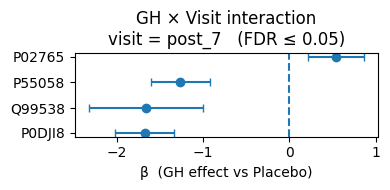

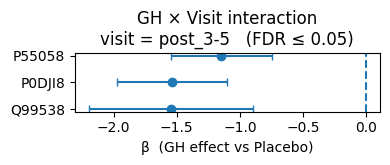

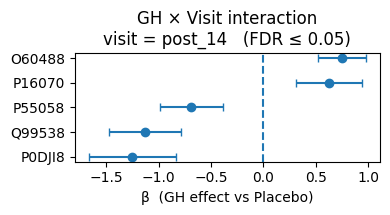

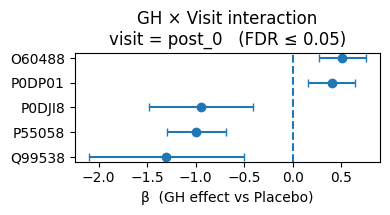

In [50]:
#forest plots
for v in visits:
    tmp = sig.loc[sig['visit'] == v].sort_values('beta')

    y_pos = range(len(tmp))
    fig, ax = plt.subplots(figsize=(4, 0.25*len(tmp)+1))

    ax.errorbar(x=tmp['beta'],
                y=y_pos,
                xerr=[tmp['beta']-tmp['ci_low'], tmp['ci_high']-tmp['beta']],
                fmt='o', capsize=3)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(tmp['protein'])
    ax.axvline(0, ls='--')
    ax.set_xlabel("β  (GH effect vs Placebo)")
    ax.set_title(f"GH × Visit interaction\nvisit = {v}   (FDR ≤ {0.05})")
    fig.tight_layout()
    plt.show()

##CK

In [25]:
#prepare DF and setup
meta = pd.read_csv('./02_preprocessing/meta.csv', index_col=0)
proteomes_impnorm_noout = pd.read_csv('./02_preprocessing/proteomes_impnorm_noout.csv', index_col=0)
meta_use = meta.copy()

meta_use['subject'] = meta_use['subject'].astype('category')

meta_use = meta_use.rename(columns={'CK (U/L)': 'CK'})
meta_use['CK'] = pd.to_numeric(meta_use['CK'], errors='coerce')

expr = proteomes_impnorm_noout.loc[meta_use.index]

cols = ['protein', 'beta', 'pval']
out_table = []

In [26]:
#per protein mixed model on CK with subject as confounder
for prot in expr.columns:

    df = meta_use.assign(intensity=expr[prot].values)
    df = df.dropna(subset=['CK', 'intensity', 'subject'])

    try:
        fit = smf.mixedlm("intensity ~ CK", df, groups=df["subject"]).fit(reml=False)
        out_table.append(dict(zip(cols, [prot, fit.params['CK'], fit.pvalues['CK']])))

    except Exception as e:
        print(f"Error for protein {prot}: {str(e)}")
        continue

results_df = pd.DataFrame(out_table)

if not results_df.empty:
    results_df['pval'] = pd.to_numeric(results_df['pval'], errors='coerce')
    results_df = results_df.dropna(subset=['pval'])
    results_df['FDR'] = multipletests(results_df['pval'], method='fdr_bh')[1]
    results_df = results_df.sort_values('FDR')


In [ ]:
#results_df.to_csv("./04_DEA/mixedLM_CK_subjcentr.csv", index=False)

164 significative FDR without subject centering.


#Predicting Long Term Outcomes From Day 0 Protein Intensities

<font color='#90fc03'>**Disclaimer:** the subsections in this chapter can be ran in any order, they do not need to be ran consequently.</font>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import LeaveOneOut, cross_val_score, KFold
from sklearn.utils import resample
from sklearn.cross_decomposition import PLSRegression

##Spearman Correlation

###Mean & Peak CK

In [28]:
#prepare DF & setup
meta_clean = meta.copy()
meta_clean['CK (U/L)'] = pd.to_numeric(meta_clean['CK (U/L)'], errors='coerce')
meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
subjects = meta_post0['subject']

ck_by_subject = (
    meta_clean.groupby('subject')['CK (U/L)']
    .agg(['max', 'mean'])
    .rename(columns={'max': 'CK_peak', 'mean': 'CK_mean'})
)

#map peak and mean CK to each post_0 sample
meta_post0['CK_peak'] = meta_post0['subject'].map(ck_by_subject['CK_peak'])
meta_post0['CK_mean'] = meta_post0['subject'].map(ck_by_subject['CK_mean'])

#extract expression matrix for post_0 samples
proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]

#for each protein, correlate post_0 abundance with CK_peak and CK_mean
results = []
for protein in proteomes_post0.columns:
    x = proteomes_post0[protein].values
    y_peak = meta_post0['CK_peak'].values
    y_mean = meta_post0['CK_mean'].values

    mask_peak = ~np.isnan(x) & ~np.isnan(y_peak)
    mask_mean = ~np.isnan(x) & ~np.isnan(y_mean)

    rho_peak, p_peak = spearmanr(x[mask_peak], y_peak[mask_peak]) if mask_peak.sum() > 2 else (np.nan, np.nan)
    rho_mean, p_mean = spearmanr(x[mask_mean], y_mean[mask_mean]) if mask_mean.sum() > 2 else (np.nan, np.nan)

    results.append({'protein': protein,
                    'rho_CK_peak': rho_peak, 'p_CK_peak': p_peak,
                    'rho_CK_mean': rho_mean, 'p_CK_mean': p_mean})

df_ckcorr = pd.DataFrame(results)

#multiple testing correction
df_ckcorr['FDR_CK_peak'] = multipletests(df_ckcorr['p_CK_peak'], method='fdr_bh')[1]
df_ckcorr['FDR_CK_mean'] = multipletests(df_ckcorr['p_CK_mean'], method='fdr_bh')[1]

#df_ckcorr.to_csv('./04_DEA/CK_correlation_post0.csv', index=False)
print(df_ckcorr.sort_values('FDR_CK_peak').head())
print(df_ckcorr.sort_values('FDR_CK_mean').head())


                                     protein  rho_CK_peak  p_CK_peak  \
589                        Q9Y6R7;A0A087WXI2    -0.451304   0.026856   
421   P60174;U3KPZ0;U3KQF3;P60174-3;P60174-4     0.505217   0.011795   
409                                   P51884     0.433043   0.034536   
414                                   P54802    -0.589565   0.002430   
370  P27487;A0A7I2V2R5;A0A7I2V2X8;A0A7I2V5R8     0.480870   0.017373   

     rho_CK_mean  p_CK_mean  FDR_CK_peak  FDR_CK_mean  
589    -0.407826   0.047901     0.661837     0.802958  
421     0.510435   0.010817     0.661837     0.574594  
409     0.427826   0.037024     0.661837     0.802958  
414    -0.626957   0.001043     0.661837     0.574594  
370     0.531304   0.007548     0.661837     0.574594  
                                           protein  rho_CK_peak  p_CK_peak  \
421         P60174;U3KPZ0;U3KQF3;P60174-3;P60174-4     0.505217   0.011795   
370        P27487;A0A7I2V2R5;A0A7I2V2X8;A0A7I2V5R8     0.480870   0.017373 

Zero correlated proteins

###Day 3-5 CK

In [29]:
#prepare dataset
meta_clean = meta.copy()
meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post7 = meta_clean[meta_clean['visit'] == 'post_3-5'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post7['subject'] = meta_post7['subject'].astype(str)

meta_post7['CK (U/L)'] = pd.to_numeric(meta_post7['CK (U/L)'], errors='coerce')
ck_post7 = meta_post7.set_index('subject')['CK (U/L)']

meta_post0['ck_post3-5'] = meta_post0['subject'].map(ck_post7)

proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]

#calculate spearman correlation
results = []
for protein in proteomes_post0.columns:
    x = proteomes_post0[protein].values
    y = meta_post0['ck_post3-5'].values

    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 2:
        rho, pval = spearmanr(x[mask], y[mask])
    else:
        rho, pval = np.nan, np.nan

    results.append({'protein': protein, 'rho': rho, 'pval': pval})

df_corr = pd.DataFrame(results)

#multiple testing correction
df_corr['FDR'] = multipletests(df_corr['pval'], method='fdr_bh')[1]

#df_corr.to_csv('./04_DEA/spearman_post0_protein_post3_CK_subjcentr.csv', index=False)
print(df_corr.sort_values('FDR').head())


                         protein       rho      pval       FDR
253                       P06732  0.625564  0.003178  0.942382
178  P02144;B0QYF8;F2Z2F1;F2Z337  0.640602  0.002342  0.942382
390  P36955;I3L4N7;I3L4F9;I3L107  0.018045  0.939809  0.991624
381                       P33908 -0.058647  0.805993  0.991624
414                       P54802 -0.572932  0.008279  0.991624


1 protein found with the subject centered dataset!!!

`A0A075B6J9` with FDR = 0.001377

###Dystrophy

In [30]:
#prepare dataset
meta_clean = meta.copy()
meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post7 = meta_clean[meta_clean['visit'] == 'post_7'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post7['subject'] = meta_post7['subject'].astype(str)

meta_post7['dystrophy (%)'] = pd.to_numeric(meta_post7['dystrophy (%)'], errors='coerce')
dystrophy_post7 = meta_post7.set_index('subject')['dystrophy (%)']

meta_post0['dystrophy_post7'] = meta_post0['subject'].map(dystrophy_post7)

proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]

#calculate spearman correlation
results = []
for protein in proteomes_post0.columns:
    x = proteomes_post0[protein].values
    y = meta_post0['dystrophy_post7'].values

    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() > 2:
        rho, pval = spearmanr(x[mask], y[mask])
    else:
        rho, pval = np.nan, np.nan

    results.append({'protein': protein, 'rho': rho, 'pval': pval})

df_corr = pd.DataFrame(results)

#multiple testing correction
df_corr['FDR'] = multipletests(df_corr['pval'], method='fdr_bh')[1]

#df_corr.to_csv('./04_DEA/post0_protein_vs_post7_dystrophy_subjcentr.csv', index=False)
print(df_corr.sort_values('FDR').head())


                                               protein       rho      pval  \
385                                  P35542;A0A096LPE2 -0.651031  0.001392   
591                                             Q9Y6Z7  0.129033  0.577230   
590  Q9Y6Y1;H0YJR7;A0A8V8TQA4;A0A8V8TQX9;A0A8V8TR82...  0.211797  0.356706   
589                                  Q9Y6R7;A0A087WXI2 -0.016944  0.941889   
588                                             Q9Y646  0.033236  0.886276   

          FDR  
385  0.825312  
591  0.997763  
590  0.997763  
589  0.997763  
588  0.997763  


No FDR < 0.05 when using only one time point or one observation per subject. This happens both with dystrophy and with CK. As soon as more observations per subject are used, it's easier to obtain statistically significant results. This means it's likely that more observations are gonna be needed before we can observe some meaningful results on things like prediction of day 7 dystrophy % from day 0 biomarkers.

##T-tests

###CK

In [31]:
#prepare dataset
meta_clean = meta.copy()
meta_clean = meta_clean.rename(columns={'CK (U/L)': 'CK'})
meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post3 = meta_clean[meta_clean['visit'] == 'post_3-5'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post3['subject'] = meta_post3['subject'].astype(str)

meta_post3['CK'] = pd.to_numeric(meta_post3['CK'], errors='coerce')
ck_post3 = meta_post3.set_index('subject')['CK']

meta_post0['CK'] = meta_post0['subject'].map(ck_post3)

#define groups
median_thresh = meta_post0['CK'].median()
meta_post0['CK_group'] = np.where(meta_post0['CK'] > median_thresh, 'High', 'Low')

proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]

#per protein t-test
results = []
for protein in proteomes_post0.columns:
    x = proteomes_post0[protein].values
    group = meta_post0['CK_group'].values

    mask = ~np.isnan(x) & ~pd.isna(group)
    if mask.sum() > 2:
        group_high = x[(group == 'High') & mask]
        group_low  = x[(group == 'Low') & mask]
        if len(group_high) > 1 and len(group_low) > 1:
            stat, pval = ttest_ind(group_high, group_low, equal_var=False)
        else:
            stat, pval = np.nan, np.nan
    else:
        stat, pval = np.nan, np.nan

    results.append({'protein': protein, 't_stat': stat, 'pval': pval})

df_ttest = pd.DataFrame(results)

#multiple testing correction
df_ttest['FDR'] = multipletests(df_ttest['pval'], method='fdr_bh')[1]

#df_ttest.to_csv('./04_DEA/ttest_post0_protein_post3_CK_subjcentr.csv', index=False)
print(df_ttest.sort_values('FDR').head())


                                               protein    t_stat      pval  \
575                         Q9UKZ4;Q9UKZ4-2;A0A8Z5AZJ6 -3.599006  0.001871   
560  Q99700;Q9NZM4;Q99700-2;Q99700-4;Q99700-5;A0A2R...  3.938633  0.000960   
414                                             P54802 -3.281045  0.003474   
459  Q13402;H7C4D8;Q13402-2;Q13402-5;Q13402-6;Q1340...  3.165164  0.004936   
563  Q9UBE0;Q9UBE0-2;Q9UBE0-3;A0A590UKC5;A0A590UKA0...  3.040519  0.006382   

          FDR  
575  0.554753  
560  0.554753  
414  0.686745  
459  0.731834  
563  0.756950  


###Dystrophy

In [32]:
#prepare data
meta_clean = meta.copy()
meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post7 = meta_clean[meta_clean['visit'] == 'post_7'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post7['subject'] = meta_post7['subject'].astype(str)

meta_post7['dystrophy (%)'] = pd.to_numeric(meta_post7['dystrophy (%)'], errors='coerce')
dystrophy_post7 = meta_post7.set_index('subject')['dystrophy (%)']

meta_post0['dystrophy_post7'] = meta_post0['subject'].map(dystrophy_post7)

median_thresh = meta_post0['dystrophy_post7'].median()
meta_post0['dystrophy_group'] = np.where(meta_post0['dystrophy_post7'] > median_thresh, 'High', 'Low')

proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]

#per protein T test
results = []
for protein in proteomes_post0.columns:
    x = proteomes_post0[protein].values
    group = meta_post0['dystrophy_group'].values

    mask = ~np.isnan(x) & ~pd.isna(group)
    if mask.sum() > 2:
        group_high = x[(group == 'High') & mask]
        group_low  = x[(group == 'Low') & mask]
        if len(group_high) > 1 and len(group_low) > 1:
            stat, pval = ttest_ind(group_high, group_low, equal_var=False)
        else:
            stat, pval = np.nan, np.nan
    else:
        stat, pval = np.nan, np.nan

    results.append({'protein': protein, 't_stat': stat, 'pval': pval})

df_ttest = pd.DataFrame(results)

#multiple testing correction
df_ttest['FDR'] = multipletests(df_ttest['pval'], method='fdr_bh')[1]


#df_ttest.to_csv('./04_DEA/post0_ttest_dystrophy_subjcentr.csv', index=False)
print(df_ttest.sort_values('FDR').head())


                                               protein    t_stat      pval  \
379                                             P32942  3.744447  0.001147   
480                                             Q15848 -4.000784  0.000921   
19                                          A0A075B6W8  1.943260  0.067011   
583                                             Q9Y490  1.542943  0.141887   
580  Q9Y243;A0A7P0T8T9;Q9Y243-2;A0A5F9ZHU3;A0A5F9ZG... -1.046059  0.308948   

          FDR  
379  0.339992  
480  0.339992  
19   0.949466  
583  0.949466  
580  0.949466  


Nothing

##Lasso

###CK

In [33]:
#prepare data
meta_clean = meta.copy()
meta_clean = meta_clean.rename(columns={'CK (U/L)': 'CK'})  # clean name

meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post3 = meta_clean[meta_clean['visit'] == 'post_3-5'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post3['subject'] = meta_post3['subject'].astype(str)

meta_post3['CK'] = pd.to_numeric(meta_post3['CK'], errors='coerce')
ck_post3 = meta_post3.set_index('subject')['CK']
meta_post0['CK_post3'] = meta_post0['subject'].map(ck_post3)

meta_post0 = meta_post0.dropna(subset=['CK_post3'])

In [34]:
proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]
X = proteomes_post0
y = meta_post0['CK_post3'].values

#fit Lasso model
loo = LeaveOneOut()
model = make_pipeline(
    StandardScaler(),
    LassoCV(cv=loo, random_state=42)
)

model.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=LeaveOneOut(), random_state=42))])

3 proteins selected:
P02144;B0QYF8;F2Z2F1;F2Z337                               3161.413250
P23975;H3BRS0;H3BRE9;H3BML6;H3BM11;A0A804HLI4;P23975-2    1193.808303
P06732                                                     482.842239
dtype: float64


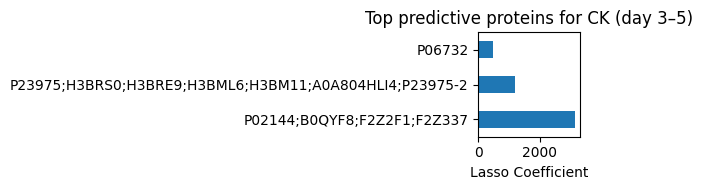

In [35]:
#extract selected proteins
lasso = model.named_steps['lassocv']
coefs = pd.Series(lasso.coef_, index=X.columns)
selected = coefs[coefs != 0].sort_values(key=np.abs, ascending=False)

print(f"{selected.shape[0]} proteins selected:")
print(selected)

#plot
if not selected.empty:
    selected.plot(kind='barh', figsize=(6, max(2, len(selected) * 0.3)))
    plt.xlabel("Lasso Coefficient")
    plt.title("Top predictive proteins for CK (day 3–5)")
    plt.tight_layout()
    plt.show()
else:
    print("No proteins selected")

When carried out on the subject-centered dataset, Lasso regression finds 14 predictors of CK:



```
A0A075B6J9
P01034
Q9UHG2                                                                      
P09493
Q15465
P12821
P51884
A2PYH4
P05546
P11597
P01011
P35542
Q9Y5Y7
P20742
```



####Bootstrapping

The Lasso model returned some proteins, but it's important to validate the stability of its performance and variable selection. In absence of more data, let's use bootstrapping with the data that is currently available.

In [38]:
X = proteomes_post0.values
y = meta_post0['CK_post3'].values

lasso = LassoCV(cv=loo, random_state=42).fit(X, y)
coef = pd.Series(lasso.coef_, index=proteomes_post0.columns)

#stability selection with 1000 bootstraps
n_boot = 1000
sel_count = pd.Series(0, index=proteomes_post0.columns)
for _ in range(n_boot):
    idx = resample(range(len(y)), replace=True, random_state=_)
    lboot = LassoCV(cv=loo).fit(X[idx], y[idx])
    sel_count += (lboot.coef_ != 0)

stab_prob = sel_count / n_boot
stable_hits = stab_prob[stab_prob > 0.6].sort_values(ascending=False)

print("Selection probability for the original proteins:") #12 when using CV=5
print(stab_prob[coef != 0].sort_values(ascending=False))

Selection probability for the original proteins:
Series([], dtype: float64)


Lasso on the subject centered dataset finds 12 proteins with 5 fold CV, and 14 proteins with LOOCV. This is promising, but these results did not replicate under bootstrapped resampling. This highlights the limits of stability of a model trained on such a small dataset. Overfitting is likely the issue.

###Dystrophy

In [ ]:
#prepare data
meta_clean = meta.copy()

meta_post0 = meta_clean[meta_clean['visit'] == 'post_0'].copy()
meta_post7 = meta_clean[meta_clean['visit'] == 'post_7'].copy()

meta_post0['subject'] = meta_post0['subject'].astype(str)
meta_post7['subject'] = meta_post7['subject'].astype(str)

meta_post7['dystrophy (%)'] = pd.to_numeric(meta_post7['dystrophy (%)'], errors='coerce')
dystrophy_post7 = meta_post7.set_index('subject')['dystrophy (%)']

meta_post0['dystrophy_post7'] = meta_post0['subject'].map(dystrophy_post7)
meta_post0 = meta_post0.dropna(subset=['dystrophy_post7'])


In [ ]:
proteomes_post0 = proteomes_impnorm_noout.loc[meta_post0.index]
X = proteomes_post0
y = meta_post0['dystrophy_post7'].values

#fit lasso model
loo = LeaveOneOut()
model = make_pipeline(
    StandardScaler(),
    LassoCV(cv=loo, random_state=42)
)

model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(cv=LeaveOneOut(), random_state=42))])

In [ ]:
#extract selected proteins
lasso = model.named_steps['lassocv']
coefs = pd.Series(lasso.coef_, index=X.columns)
selected = coefs[coefs != 0].sort_values(key=np.abs, ascending=False)

print(f"{selected.shape[0]} proteins selected by Lasso:")
print(selected)

0 proteins selected by Lasso:
Series([], dtype: float64)


Lasso does not select any day 0 proteins for day 7 dystrophy

##PLS

<font color='red'>Not explored in detail.</font>

###CK

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error

cv = LeaveOneOut()
cv_scores = []

for n in component_range:
    pls = PLSRegression(n_components=n)
    pipeline = make_pipeline(StandardScaler(), pls)
    # Use negative MSE because cross_val_score expects higher values to be better
    score = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    cv_scores.append(score)

best_n = component_range[np.argmax(cv_scores)]
print(f"Best number of components: {best_n} with neg. MSE = {max(cv_scores):.3f}")


NameError: name 'component_range' is not defined

```
MSE = -384464079.169
```

Desperate

In [ ]:
#final model with best number of components
pls_final = PLSRegression(n_components=best_n)
pls_final.fit(X_scaled, y)

#get top contributing proteins
coefs = pd.Series(pls_final.coef_.ravel(), index=X.columns)
top_proteins = coefs.abs().sort_values(ascending=False).head(20)

print("Top contributing proteins to CK prediction:")
print(top_proteins)

Top contributing proteins to CK prediction:
A0A075B6J9                                                                                                                             637.895914
P01034                                                                                                                                 474.167780
Q9UBE0;Q9UBE0-2;Q9UBE0-3;A0A590UKC5;A0A590UKA0;A0A590UK93;M0QX65;M0QZS6;B3KNJ4                                                         467.535678
Q8WZ42;Q8WZ42-2;Q8WZ42-3;Q8WZ42-4;Q8WZ42-5;Q8WZ42-7;Q8WZ42-8;Q8WZ42-9;A0A0A0MTS7;A0A0A0MRA3;Q8WZ42-10;Q8WZ42-11;Q8WZ42-12;Q8WZ42-13    462.235027
P09493;P09493-4;P09493-6;A0A0S2Z4G6;H0YKJ4;H0YK48;A0A494C0I0;P09493-10;A0A994J554                                                      454.380930
Q9Y2I9;Q9Y2I9-2;Q9Y2I9-3;F8VZ81                                                                                                        450.262822
P02144;B0QYF8;F2Z2F1;F2Z337                                                     

I'm not quite sure how much time it would take to obtain a reasonable model, or if that's even possible at all, so let's move on

#Enrichment Analysis

In [51]:
pip install gprofiler-official

In [59]:
import pandas as pd
from gprofiler import GProfiler

##CK

In [60]:
#prepare data
df = pd.read_csv("./04_DEA/mixedLM_CK.csv")

df = df[df["FDR"] < 0.05]
df = df[df["beta"] < 0] #CHANGE HERE FOR POSITIVE/NEGATIVE CORRELATION

df["UniProt_ID"] = df["protein"].str.split(";").str[0]
unique_ids = df["UniProt_ID"].dropna().unique().tolist()

In [61]:
#carried out on lasso results (manually written here)

#positive correlation
#unique_ids = ['A0A075B6J9', 'P01034', 'Q9UHG2', 'Q15465', 'P12821', 'P51884', 'Q9Y5Y7']

#negative correlation
unique_ids = ['P09493', 'A2PYH4', 'P05546', 'P11597', 'P01011', 'P35542', 'P20742']

In [62]:
gp = GProfiler(return_dataframe=True)

#run enrichment
results = gp.profile(
    organism="hsapiens",
    query=unique_ids,
    sources=["GO:BP", "GO:MF", "GO:CC", "KEGG", "REAC"]
)

significant = results[results["p_value"] < 0.05]


In [ ]:
#significant.to_csv('./05_enrichment/post3_CK_protein_negative.csv', index=False)


##Treatment * Visit

In [86]:
#prepare data
df = pd.read_csv("./04_DEA/mixedLM_visit_treatment.csv")

df = df[df["FDR"] < 0.05].copy()
df = df[df["beta"] > 0] #CHANGE HERE FOR POSITIVE/NEGATIVE CORRELATION
df["UniProt_ID"] = df["protein"].str.split(";").str[0]
unique_ids = df["UniProt_ID"].dropna().unique().tolist()


In [87]:
gp = GProfiler(return_dataframe=True)

#run enrichment
results = gp.profile(
    organism="hsapiens",
    query=unique_ids,
    sources=["GO:BP", "GO:MF", "GO:CC", "KEGG", "REAC"]
)

significant = results[results["p_value"] < 0.05]


In [88]:
#significant.to_csv('./05_enrichment/visit_treatment_positive.csv', index=False)


In [73]:
#enrichment by visit
enrichment_by_term = {}

for term, group in df.groupby("term"): #group by visit
    ids = group["UniProt_ID"].dropna().unique().tolist()
    result = gp.profile(
        organism="hsapiens",
        query=ids,
        sources=["GO:BP", "GO:MF", "GO:CC", "KEGG", "REAC"]
    )
    #keep only significant terms
    significant = result[result["p_value"] < 0.05]
    if not significant.empty:
        enrichment_by_term[term] = significant
    else:
        print(f"No significant terms for {term}")



No significant terms for C(visit)[T.post_7]:C(treatment)[T.GH]


In [75]:
#save each enrichment result
for term, df_term in enrichment_by_term.items():
    safe_term = term.replace("C(visit)[T.", "").replace("]:C(treatment)[T.GH]", "")
    filename = f"./05_enrichment/visit_treatment_{safe_term}_positive.csv"
    #df_term.to_csv(filename, index=False)